# Polynomial regression

This notebook is practice and experiments with polynomial regression

## Linear regression with x^2 and x^3 features

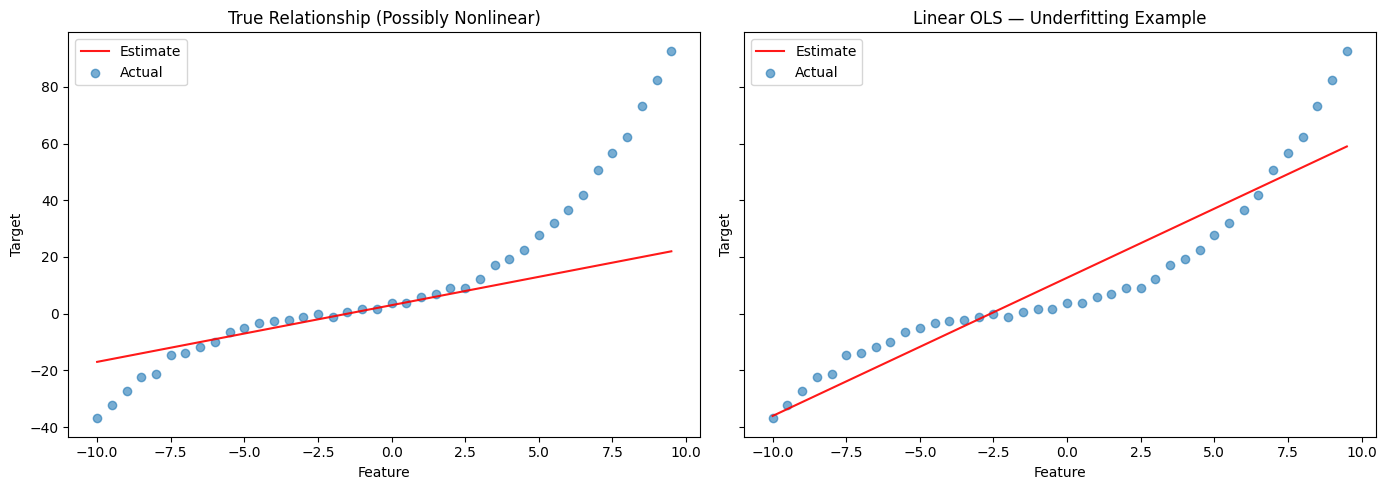

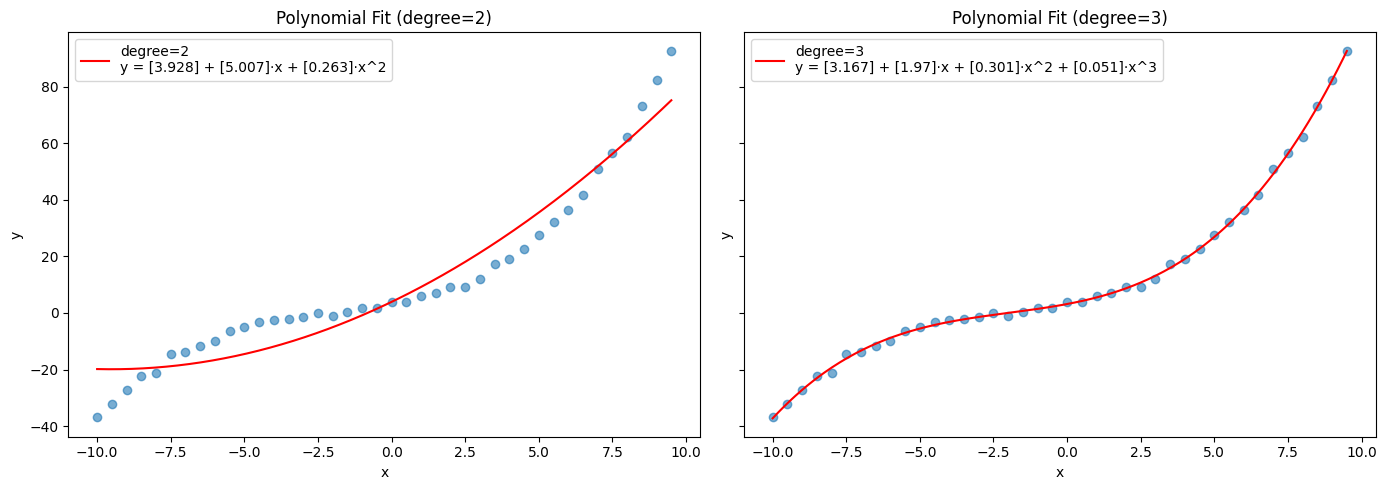

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mlpeople.optimization.experiments import run_linear_underfit_experiment
from mlpeople.models.linear import plot_polynomial_fit_1d

# Create a slightly nonlinear relationship:
# linear trend + small quadratic and cubic terms to introduce curvature
# ys = 2*xs + 3 + 0.3*(xs^2) + 0.05*(xs^3)
xs, ys_noisy, beta_ols = run_linear_underfit_experiment(
    w_true=2,
    b_true=3,
    ys_non_linearity_fn=lambda x:  0.3*(x**2) + 0.05*(x**3)
)

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# adds x^2 as second feature, fit ols, predicts and plot fit line
beta_2 = plot_polynomial_fit_1d(xs, ys_noisy, degree=2, ax=axes[0], show=False)

# adds x^2 and x^3 as features, fit ols, predicts and plot fit line
beta_3 = plot_polynomial_fit_1d(xs, ys_noisy, degree=3, ax=axes[1], show=False)

plt.tight_layout()
plt.show()

## Add sinus component to linear
Add sinus component to linear and try to fit with polynomial features experiment

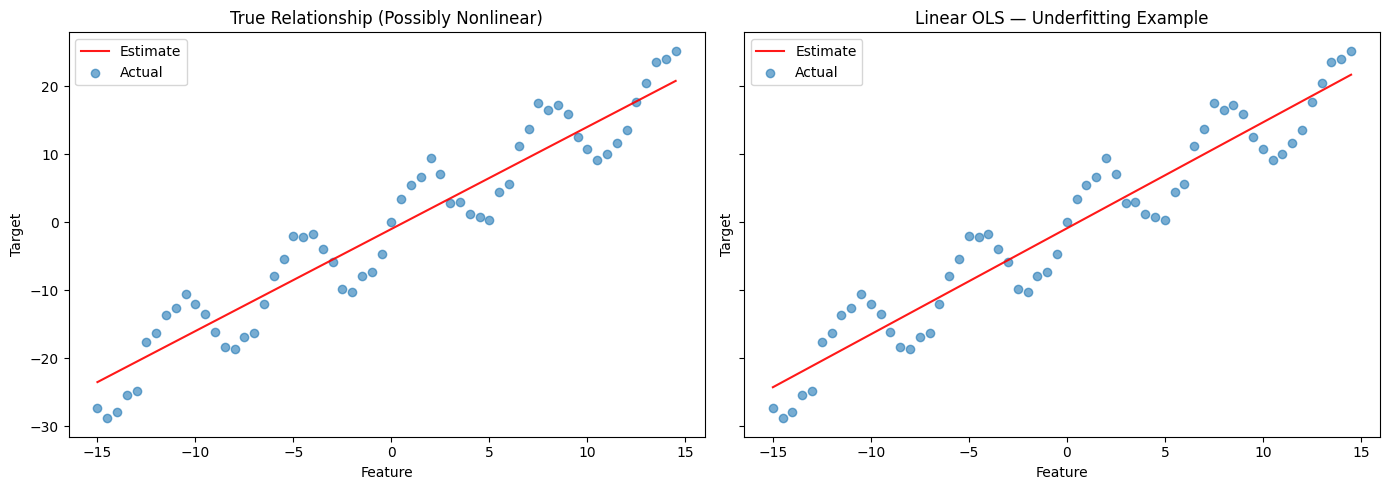

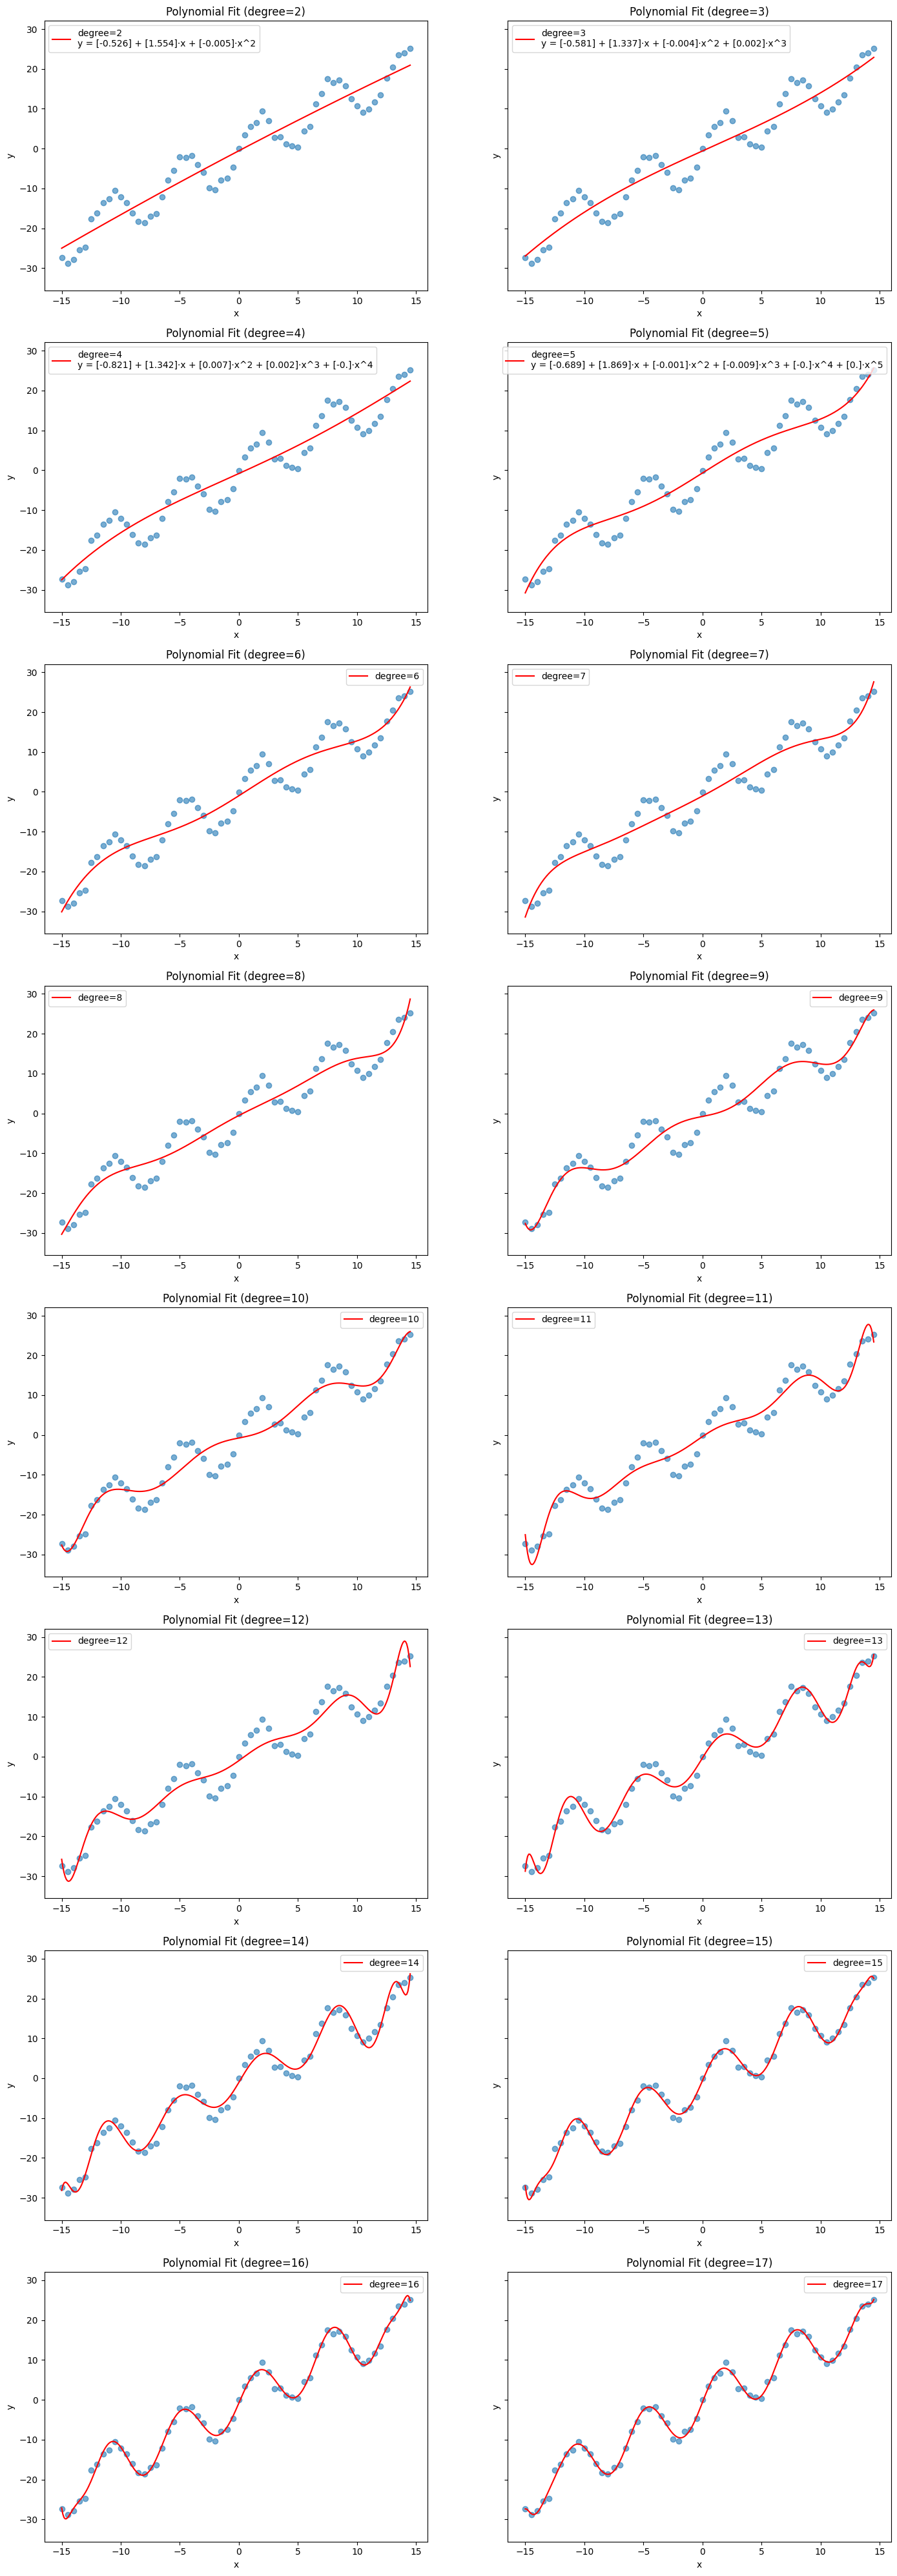

In [2]:
# Create a slightly nonlinear relationship:
# linear trend + sinus terms to introduce curvature
# ys = 1.5*xs - 1 + 6*sin(xs)
xs, ys_noisy, beta_ols = run_linear_underfit_experiment(
    w_true=1.5,
    b_true=-1,
    xs_range=np.arange(-15, 15, 0.5),
    ys_non_linearity_fn=lambda xs: 6*np.sin(xs)
)

# test degrees up to 17 and show plots
degrees = range(2, 18)

fig, axes = plt.subplots(8, 2, figsize=(14,40), sharey=True)
axes = axes.flatten()

for ax, degree in zip(axes, degrees):
    last_beta = plot_polynomial_fit_1d(
        xs, ys_noisy, degree=degree, ax=ax, show=False,
        show_beta=(False if degree > 5 else True)
    )

plt.tight_layout()
plt.show()

## Combine Sin square and cubic

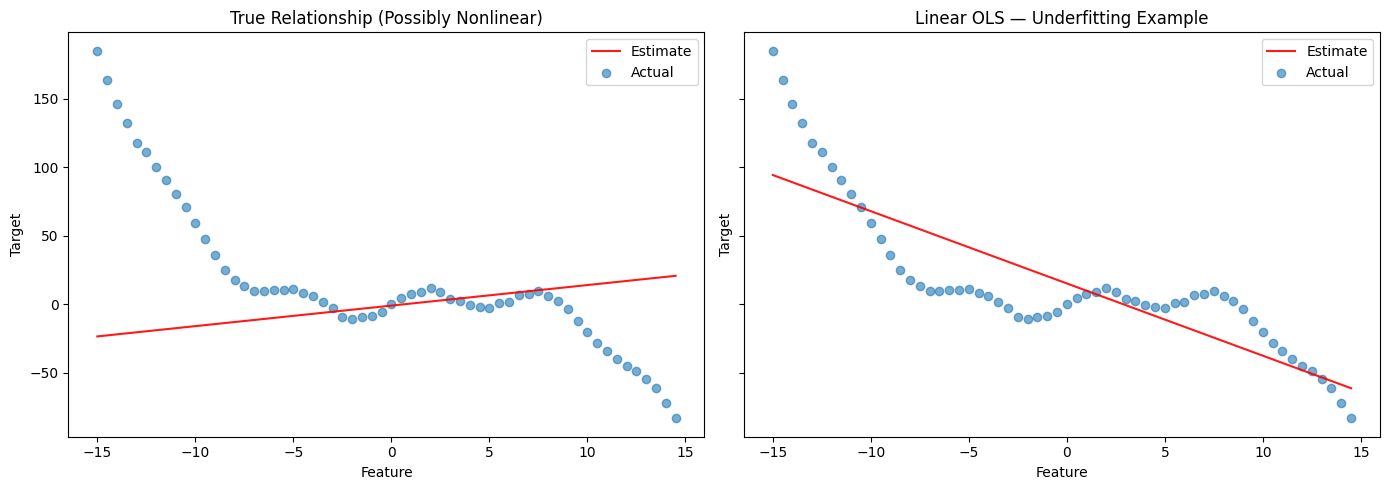

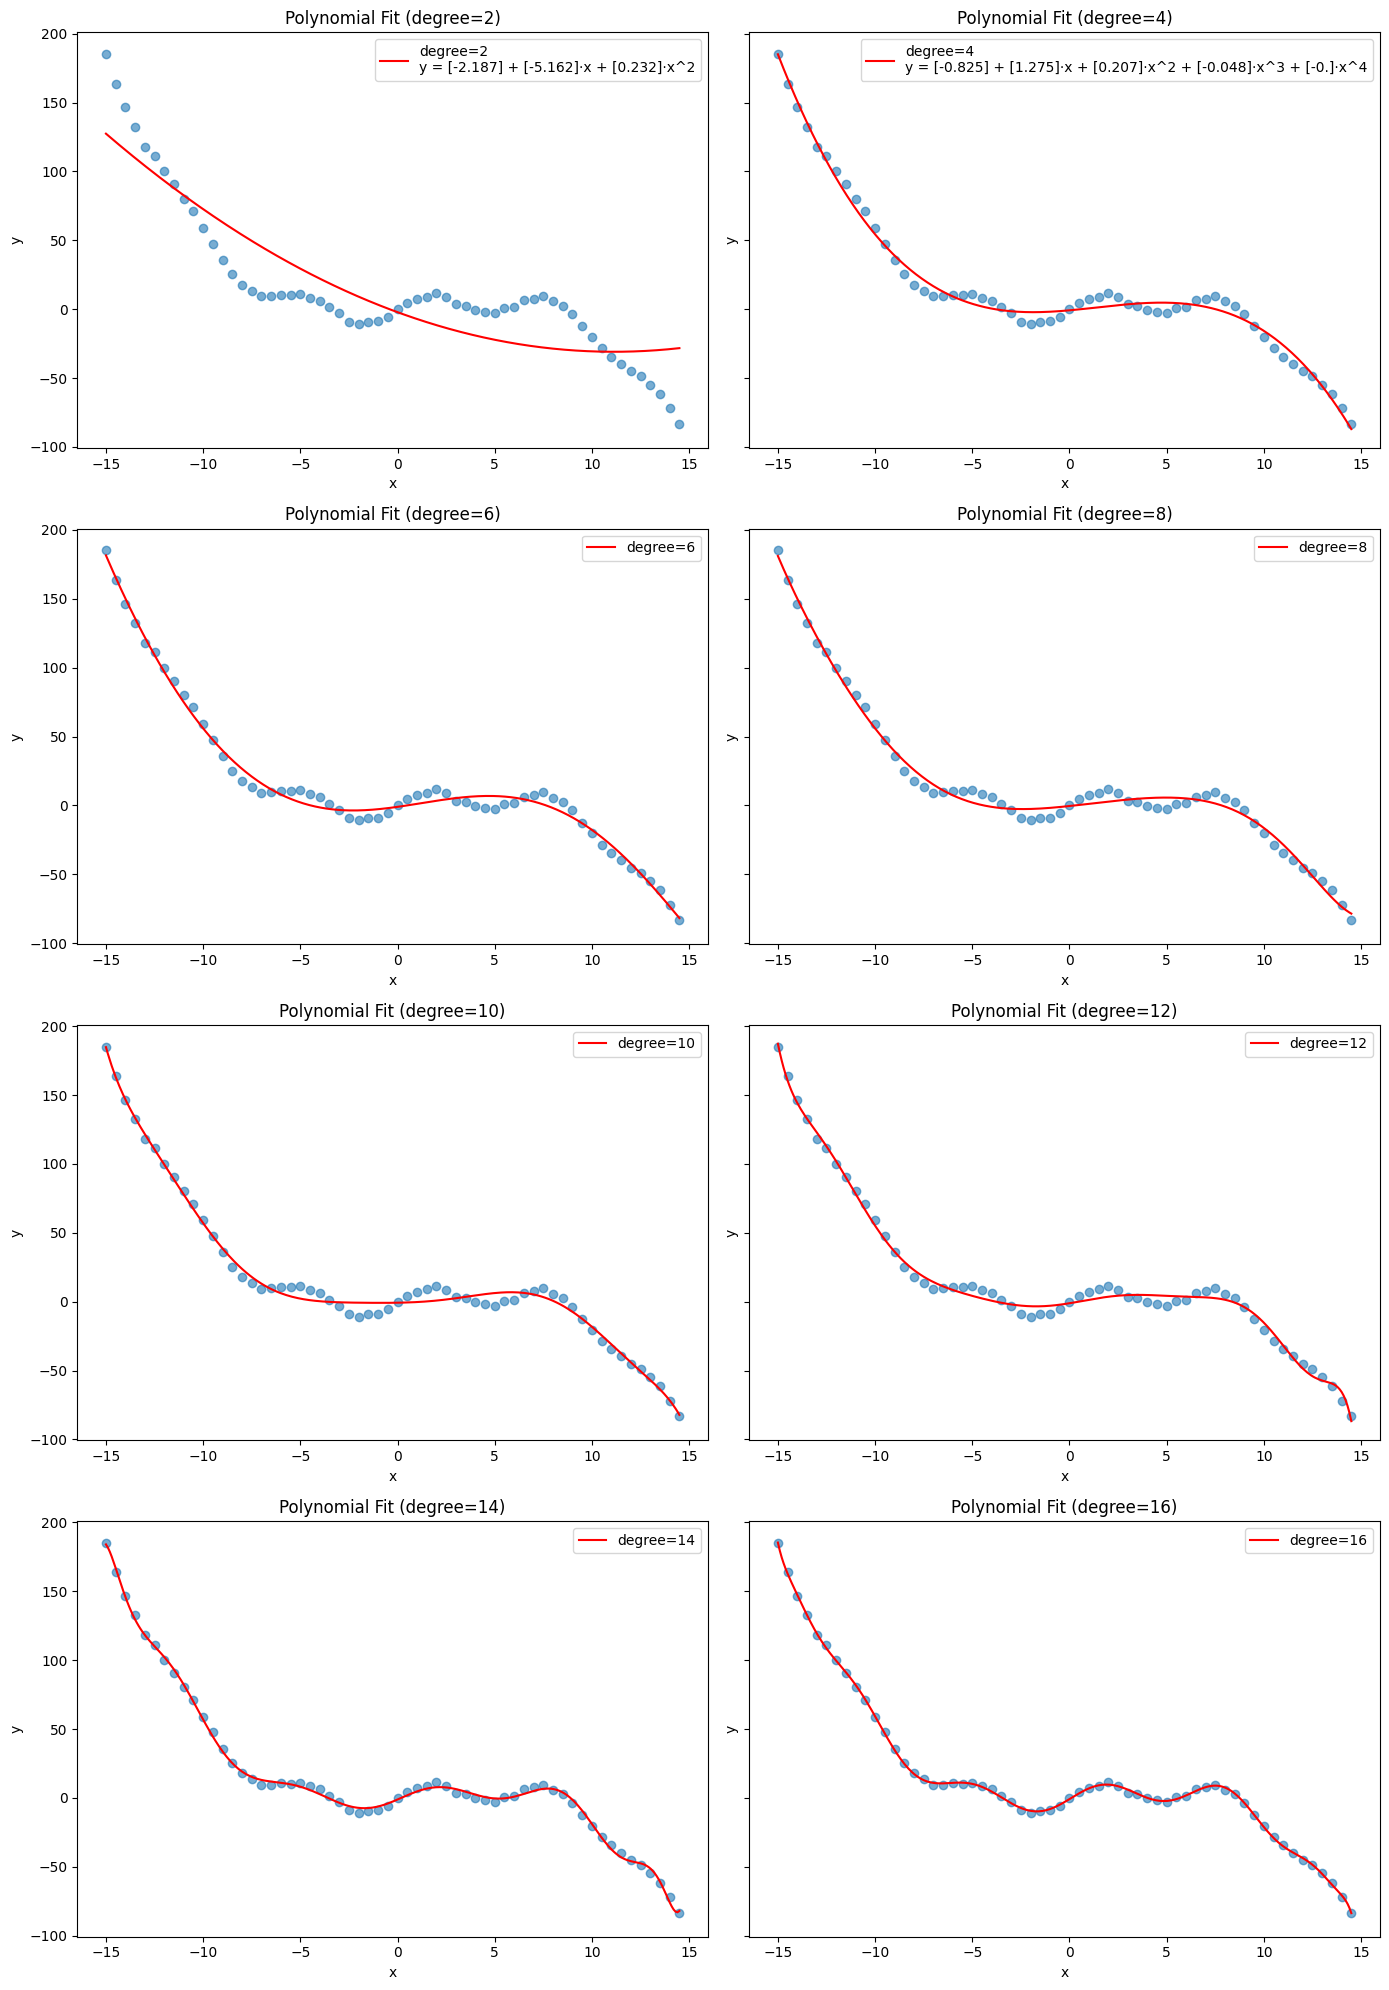

In [3]:
# ys = 1.5*xs - 1 + 0.2*x^2 - 0.05*x^3 + 8*sin(xs)
xs, ys_noisy, beta_ols = run_linear_underfit_experiment(
    w_true=1.5,
    b_true=-1,
    xs_range=np.arange(-15, 15, 0.5),
    ys_non_linearity_fn=lambda xs: 0.2*xs**2 - 0.05*xs**3 + 8*np.sin(xs)
)

degrees = range(2, 18, 2)

fig, axes = plt.subplots(4, 2, figsize=(14,20), sharey=True)
axes = axes.flatten()

for ax, degree in zip(axes, degrees):
    last_beta = plot_polynomial_fit_1d(
        xs, ys_noisy, degree=degree, ax=ax, show=False,
        show_beta=(False if degree > 5 else True)
    )

plt.tight_layout()
plt.show()

## Polynomial Regression – Gradient Descent from Scratch
based on https://towardsdatascience.com/polynomial-regression-gradient-descent-from-scratch-279db2936fe9/


### Intro

In [4]:
# choose coefficients for a second degree polynomial equation (𝑎𝑥²+𝑏𝑥+𝑐)
coeffs = [2, -5, 4]

In [5]:
# copied
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
    
    Returns:
        y: The corresponding output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    return y

In [6]:
# implemented
def eval_nth_degree(coeffs, x):
    y = 0
    for coeff, degree in zip(coeffs, range(len(coeffs)-1, -1, -1)):
        y += coeff*x**degree
    return y

In [7]:
# check implementation
for x in range(1, 50, 1):
    if eval_2nd_degree(coeffs, x) != eval_nth_degree(coeffs, x):
        raise ValueError(f"eval_nth_degree is not same as eval_2nd_degree, x={x}")


### Creating the data and base model

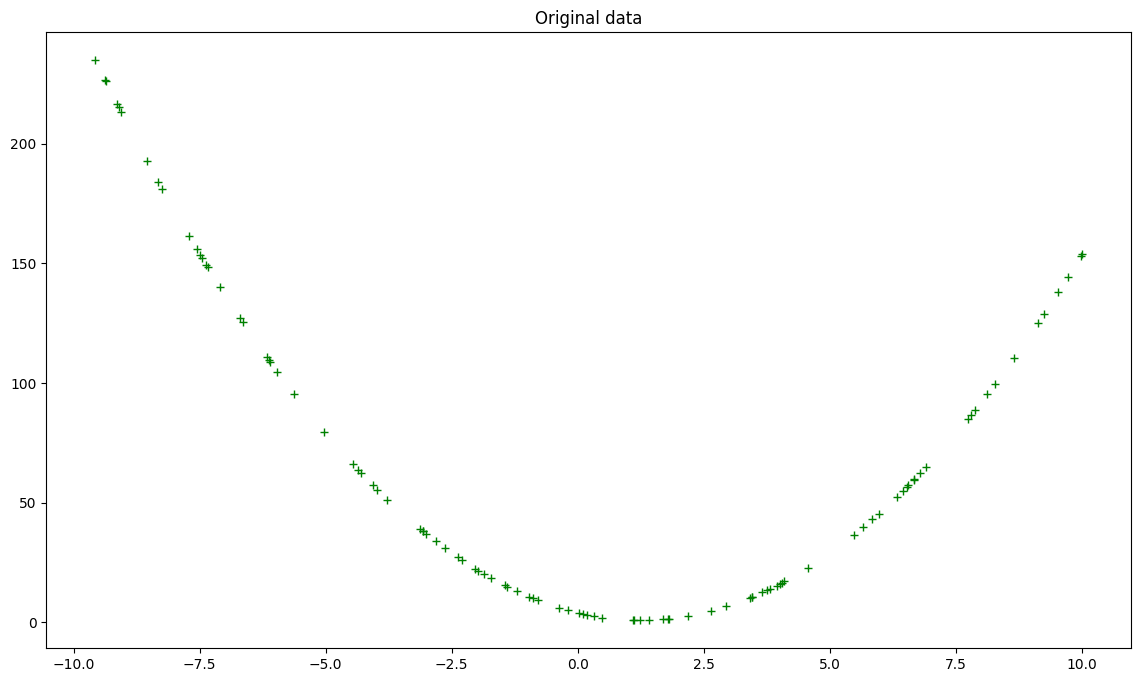

In [8]:
import numpy as np
import matplotlib.pyplot as plt

hundred_xs=np.random.uniform(-10,10,100)
# print(hundred_xs)

x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [9]:
def eval_2nd_degree_jitter(coeffs, x, j, verbose=False, seed=None):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y−j,y+j].
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.
    
    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.
    
    """


    rng = np.random.default_rng(seed) if seed else np.random.default_rng()

    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c

    if not verbose:
        print(y)
    
    interval = [y-j, y+j]
    interval_min = interval[0]
    interval_max = interval[1]

    if not verbose:
        print(f"Should get value in the range {interval_min} - {interval_max}")

    jit_val = rng.random() * interval_max      # Generate a random number in range 0 to interval max 
    
    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = rng.random() * interval_max  # it is not in the right range. Re-roll the generator until it 
                                                  # give a number greater than the interval min. 
    
    return jit_val

In [10]:
x=3
j=4
eval_2nd_degree_jitter(coeffs, x, j)

7
Should get value in the range 3 - 11


4.226064020043756

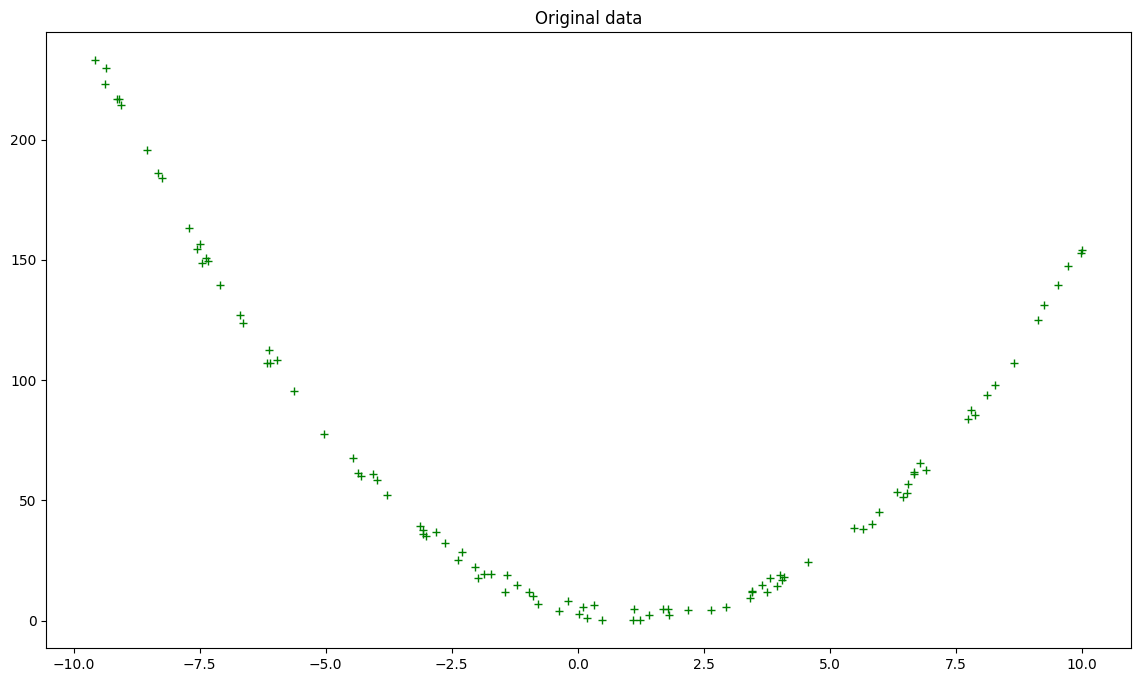

In [11]:
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, j, verbose=True)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

### First pass at modelling – try a random model

In [12]:
rng = np.random.default_rng(55)
rand_coeffs = (rng.integers(-10, 10), rng.integers(-10, 10), rng.integers(-10, 10))

rand_coeffs

(np.int64(9), np.int64(6), np.int64(4))

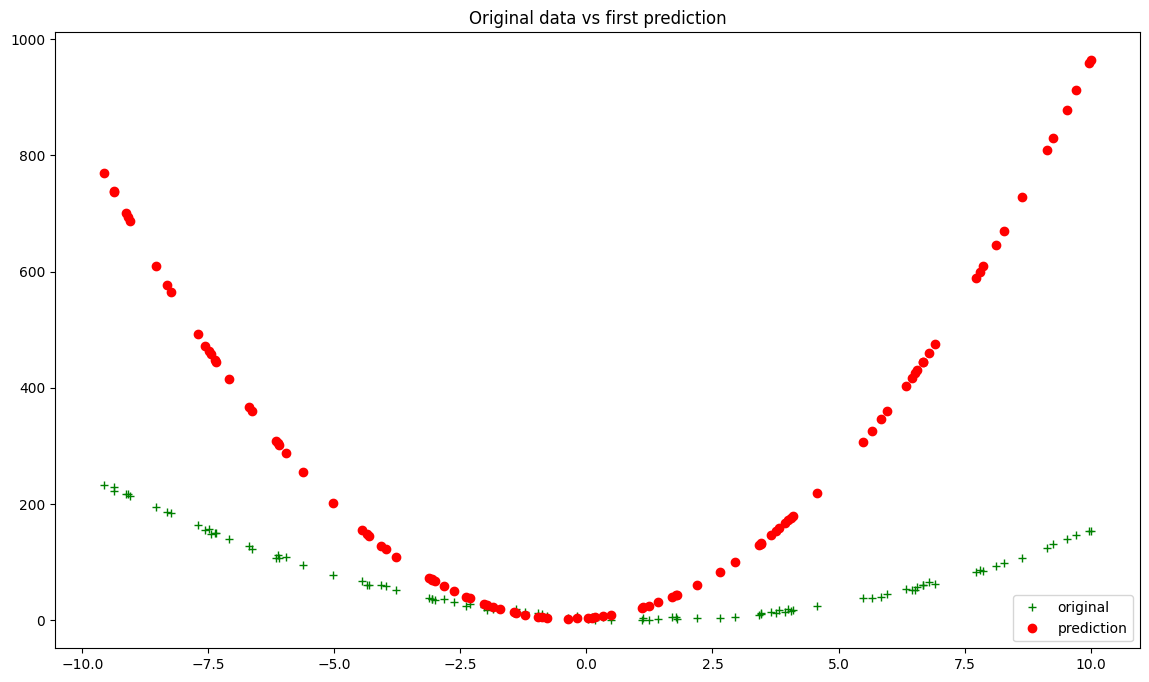

In [13]:
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)

plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label='prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [14]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.
    
    Args:
        ys: training data labels
        y_bar: prediction labels
    
    Returns: Calculated MSE loss.
    """
    return sum((ys - y_bar)*(ys - y_bar)) / len(ys)
  
initial_model_loss = loss_mse(ys, y_bar)
  
initial_model_loss

np.float64(99294.64170579267)

### Gradient Descent and Loss Reduction

MSE loss function

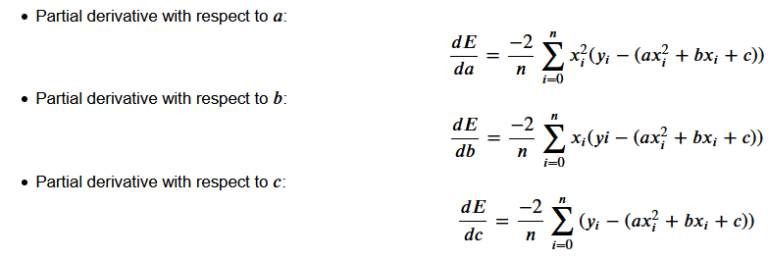

 - If you calculate the value of each derivative, you will obtain the gradient for each coefficient.
 - These are the values that give you the slope of the loss function with regards to each specific coefficient.
 - They indicate whether you should increase or decrease it to reduce the loss, and also by how much it should be safe to do so.

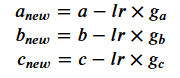

#### Get that loss down

In [15]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys): 
    """
    calculates the gradient for a second degree polynomial.
    
    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        
    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.
    
    """
    
    a_s = []
    b_s = []
    c_s = []
    
    
    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)
    
    for x,y,y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    return(gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [16]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")
print("")

#update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (np.float64(6.282980127945351), np.float64(5.922951653066099), np.float64(3.954932371901667))

Now have smaller model loss: 39687.77502521875 vs 99294.64170579267


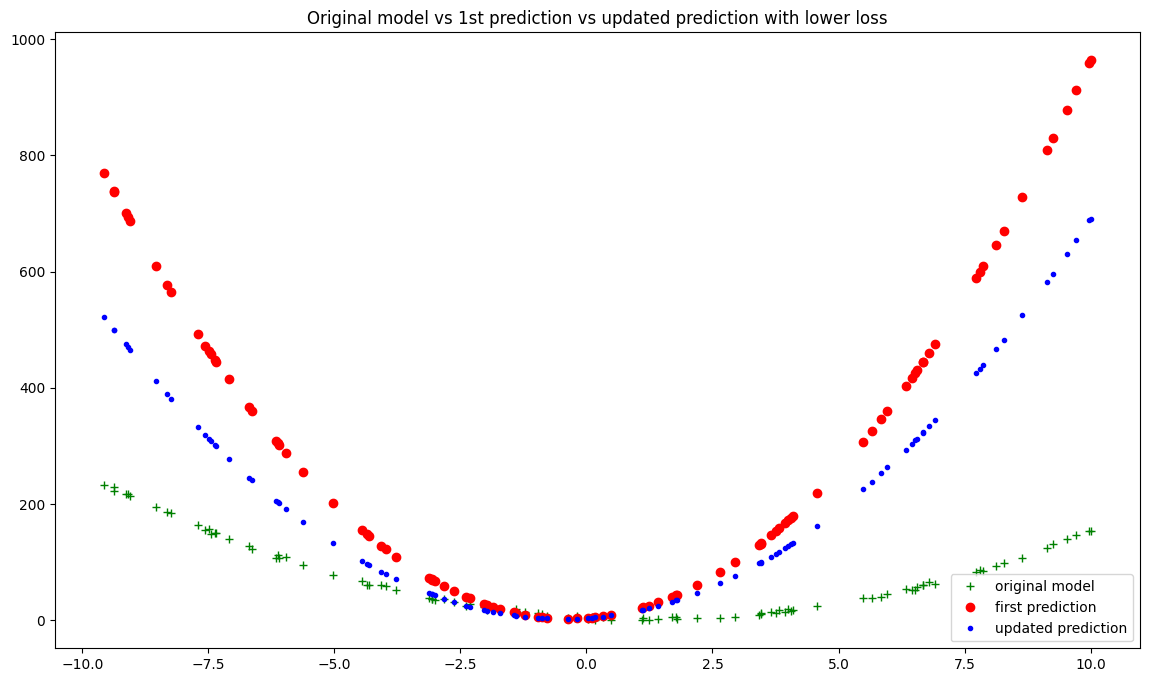

In [17]:
plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

## Iterative Gradient Descent over many epochs


In [18]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    """
    calculates the gradient for a second degree polynomial.
    
    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        
    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.
    
    """
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2        
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


In [19]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.
    
    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss. 
        lr: specified learning rate
        
    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])

    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

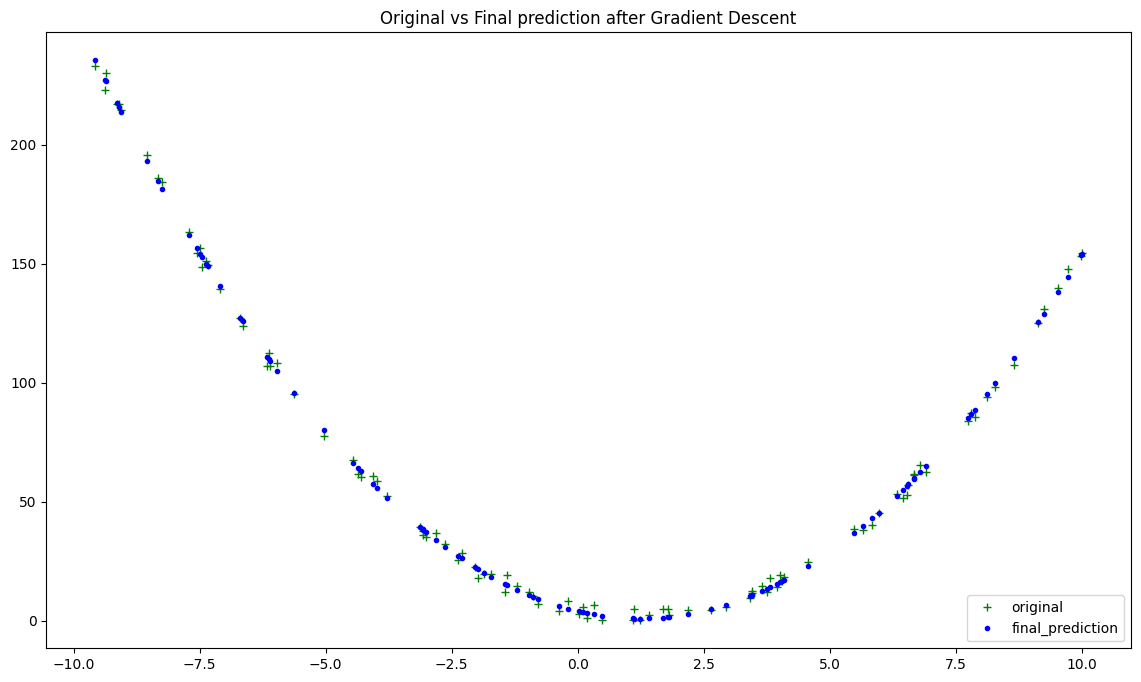

In [20]:
GD = gradient_descent(1500, 0.0001)

plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

In [21]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (np.float64(2.004448014582211), np.float64(-5.022196078909267), np.float64(3.9640745776957855))
Original Coefficients: [2, -5, 4]


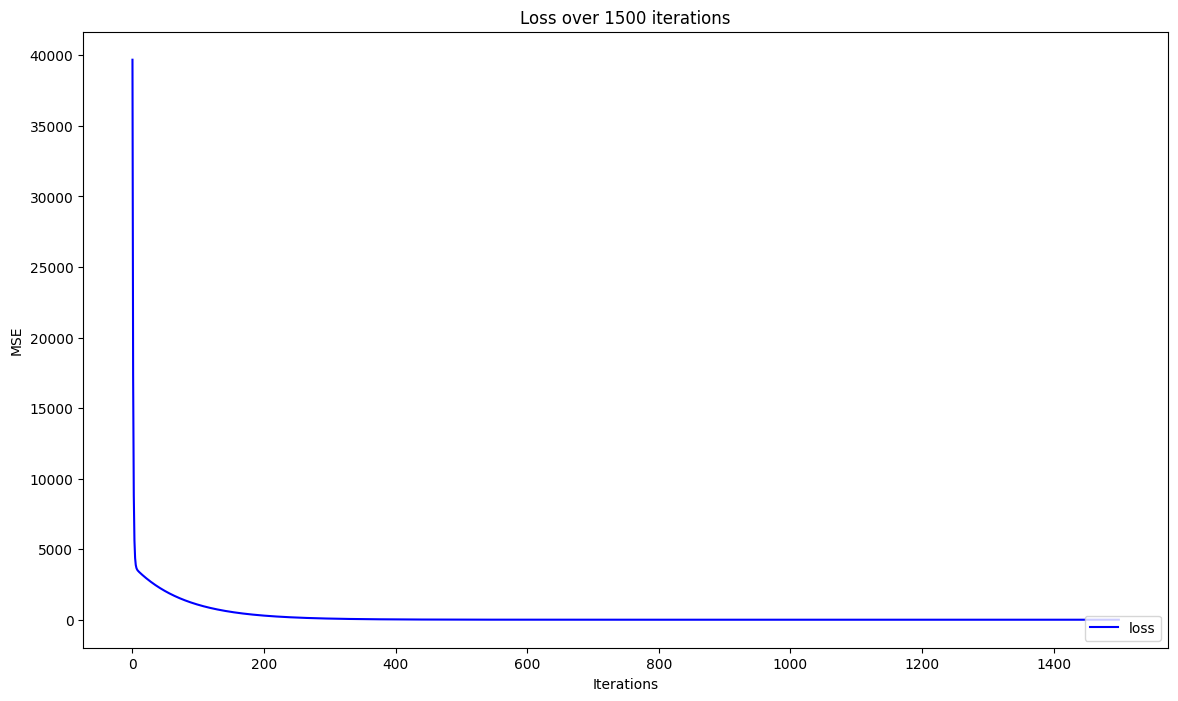

In [22]:
plt.figure(figsize=(14,8))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

## Make it Nth Polynomial

re-implement all above functions to work with any polynomial degree

### Re-implement function and make simple experiment

In [23]:
coeffs = [0.2, 1.5, -5, 4]

In [24]:
def eval_nth_degree(coeffs, x):
    y = 0
    for coeff, degree in zip(coeffs, range(len(coeffs)-1, -1, -1)):
        y += coeff*x**degree
    return y

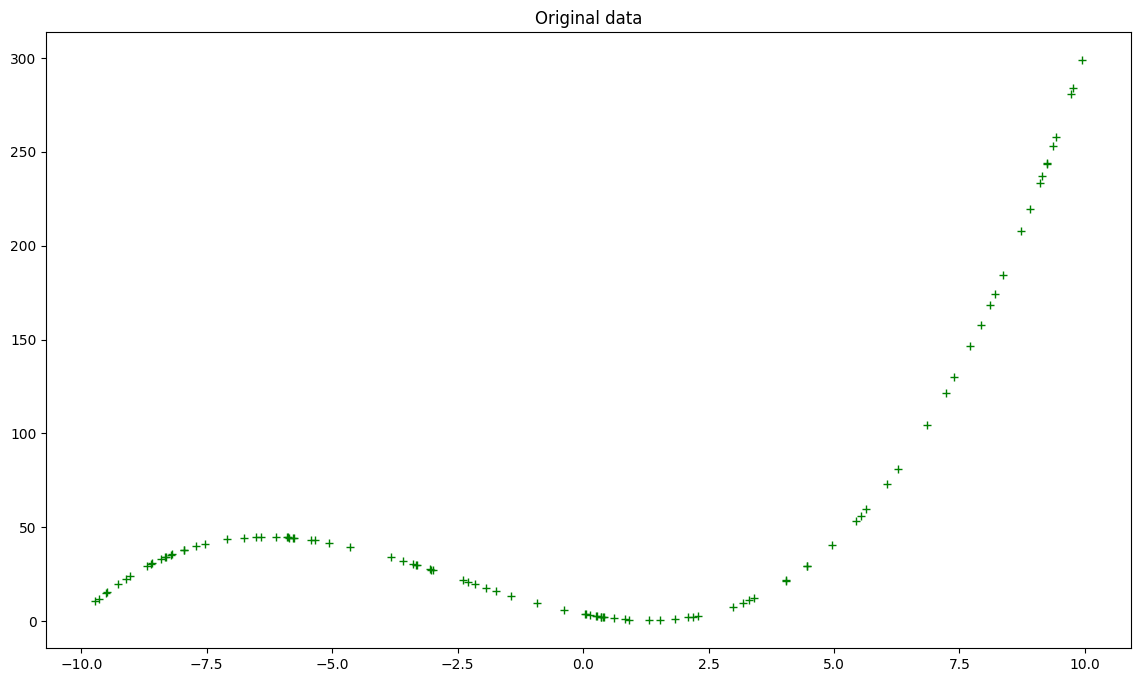

In [25]:
import numpy as np
import matplotlib.pyplot as plt

hundred_xs=np.random.uniform(-10,10,100)
# print(hundred_xs)

x_y_pairs = []
for x in hundred_xs:
    y  = eval_nth_degree(coeffs, x)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [26]:
def eval_nth_degree_jitter(coeffs, x, pct=0.05, seed=None, verbose=False):
    """
    Adds relative jitter to polynomial output.

    pct = 0.05 → 5% noise
    """

    rng = np.random.default_rng(seed)
    y = eval_nth_degree(coeffs, x)

    jitter_range = abs(y) * pct

    jittered_y = rng.uniform(
        y - jitter_range,
        y + jitter_range
    )

    if verbose:
        print(f"True y: {y}")
        print(f"Range: {y-jitter_range} to {y+jitter_range}")
        print(f"Jittered y: {jittered_y}")

    return jittered_y

In [27]:
eval_nth_degree_jitter(coeffs, 4, pct=0.1, verbose=True)

True y: 20.799999999999997
Range: 18.72 to 22.879999999999995
Jittered y: 21.789490089744852


21.789490089744852

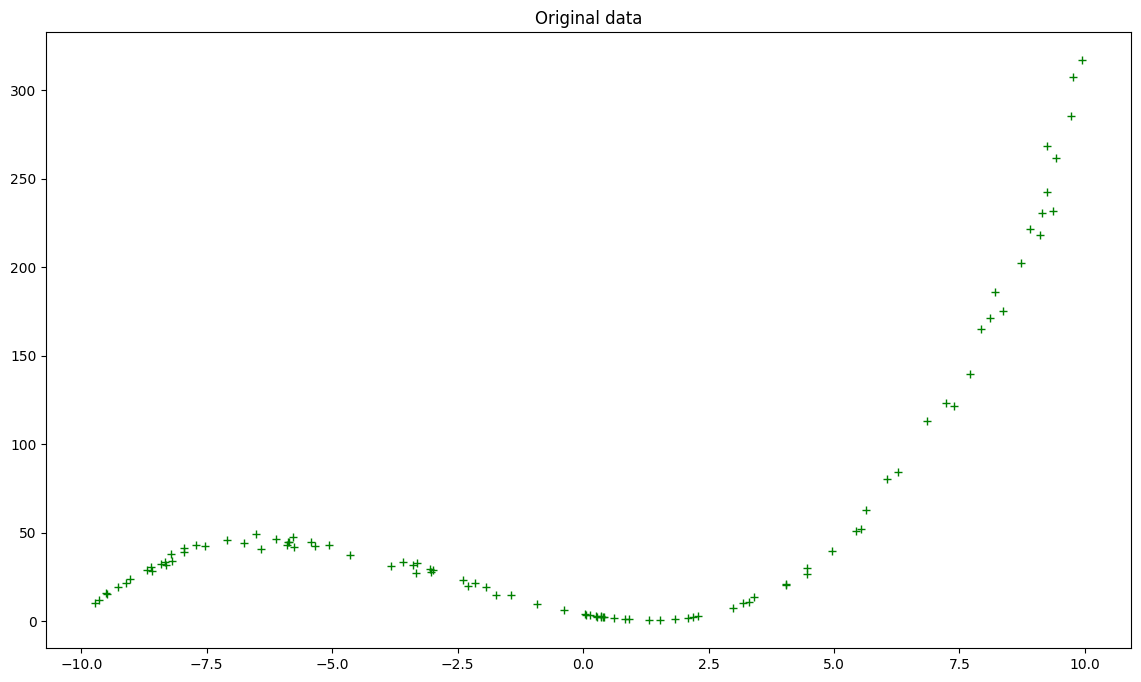

In [28]:
x_y_pairs = []
pct=0.1
for x in hundred_xs:
    y  = eval_nth_degree_jitter(coeffs, x, pct=pct, verbose=False)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [29]:
rng = np.random.default_rng(55)
rand_coeffs = rng.integers(-5, 5, size=len(coeffs))

rand_coeffs

array([4, 3, 2, 3])

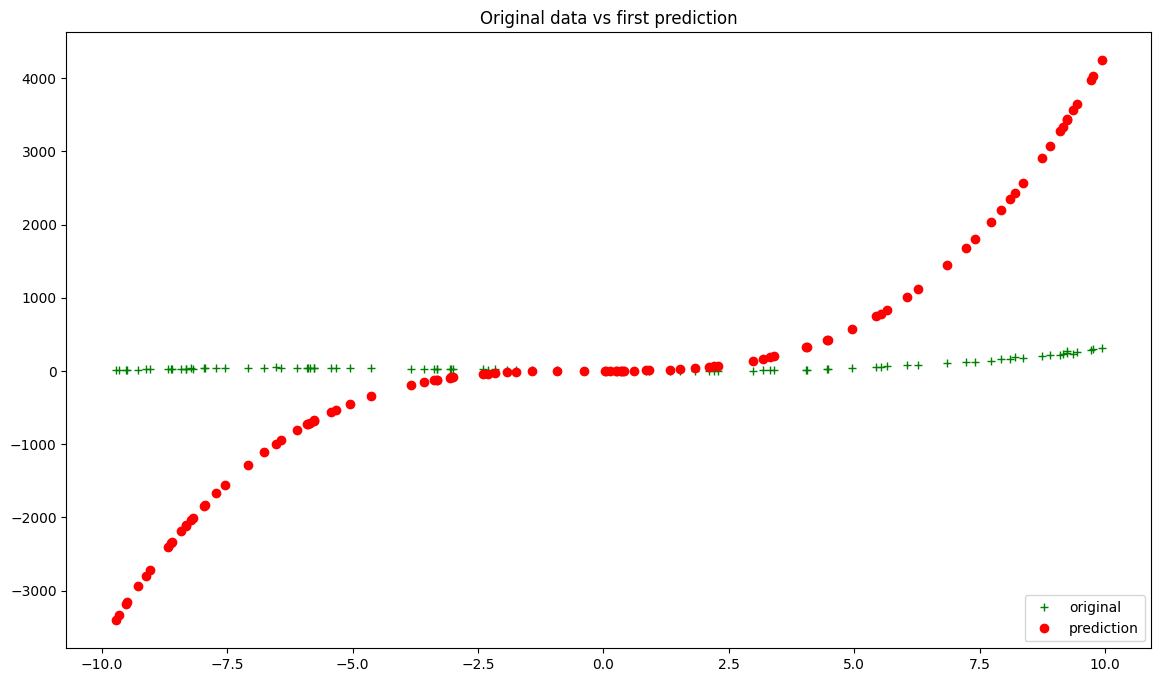

In [30]:
y_bar = eval_nth_degree(rand_coeffs, hundred_xs)

plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label='prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [31]:
initial_model_loss = loss_mse(ys, y_bar)
  
initial_model_loss

np.float64(2847953.8293063897)

In [32]:
def calc_gradient_nth_poly(coeffs, xs, ys):
    """
    Gradient for MSE with coefficients ordered highest-degree first.
    """

    grads = [0.0] * len(coeffs)
    y_preds = eval_nth_degree(coeffs, xs)
    n = len(xs)
    max_degree = len(coeffs) - 1

    for x, y, y_pred in zip(xs, ys, y_preds):
        error = y - y_pred
        
        for i in range(len(coeffs)):
            degree = max_degree - i
            grads[i] += (x ** degree) * error

    grads = [(-2 / n) * g for g in grads]

    return grads

In [33]:
calc_grads = calc_gradient_nth_poly(rand_coeffs, hundred_xs, ys)

# higher lr diverge
lr = 0.000001

new_model_coeffs = [
    coeff - lr * grad
    for coeff, grad in zip(rand_coeffs, calc_grads)
]

print(f"New model coeffs: {new_model_coeffs}")
print("")

#update with these new coeffs:
new_y_bar = eval_nth_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: [np.float64(2.538300498814813), np.float64(2.9949950279722004), np.float64(1.9804825961413335), np.float64(3.000011860700028)]

Now have smaller model loss: 1112608.5820088799 vs 2847953.8293063897


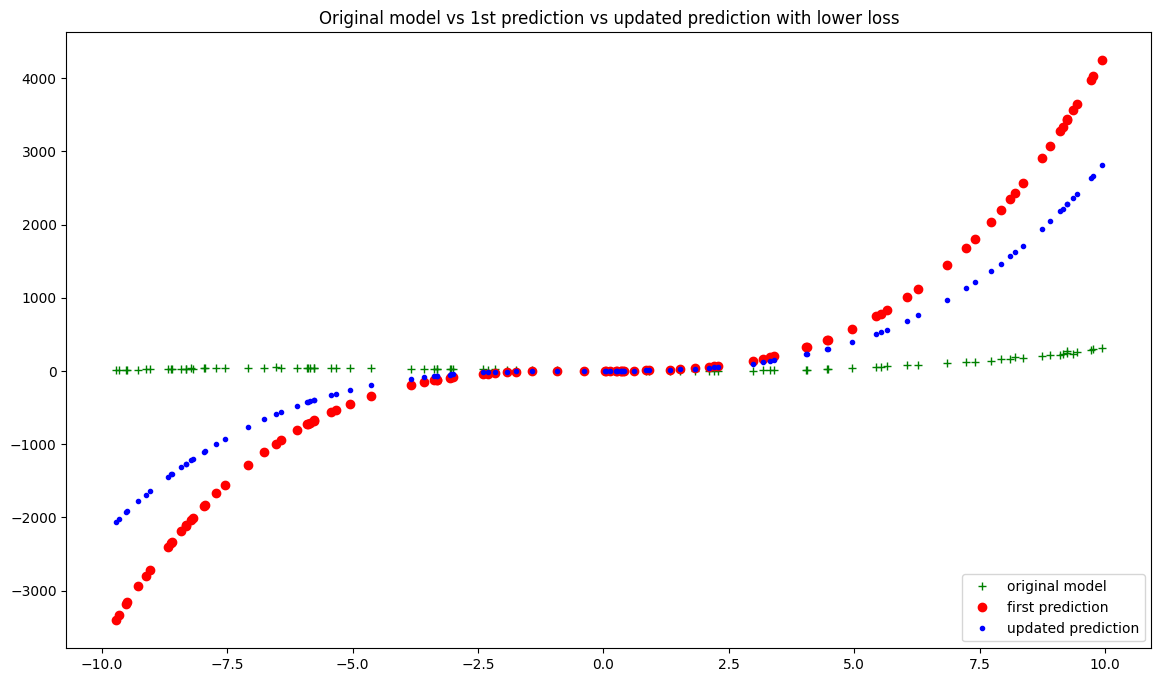

In [34]:
plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [35]:
def calc_gradient_nth_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    """
    calculates the gradient for a any degree polynomial.
    """
    calc_grads = calc_gradient_nth_poly(coeffs, inputs_x, outputs_y)

    new_model_coeffs = [coeffs[index] - lr * calc_grad for index, calc_grad in zip(range(0, len(coeffs)), calc_grads)]
    
    #update with these new coeffs:
    new_y_bar = eval_nth_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


In [36]:
def gradient_descent_nth(epochs, lr, hundred_xs, ys, rand_coeffs):
    """
    Perform gradient descent for a any degree polynomial.
    
    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss. 
        lr: specified learning rate
        
    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_nth_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    # print(losses)
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

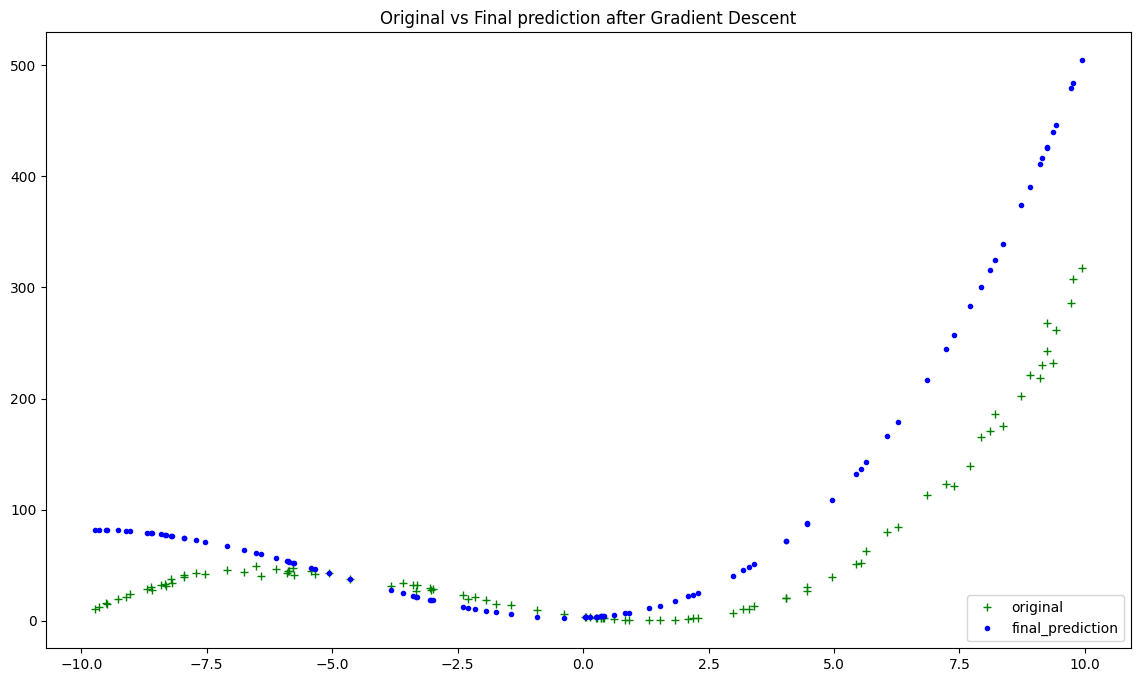

In [37]:
GD = gradient_descent_nth(100, 1e-7, hundred_xs, ys, rand_coeffs)

plt.figure(figsize=(14,8))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

In [38]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: [np.float64(0.19561738113905464), np.float64(2.9352089742921), np.float64(1.9489530235954255), np.float64(2.9992548387413906)]
Original Coefficients: [0.2, 1.5, -5, 4]


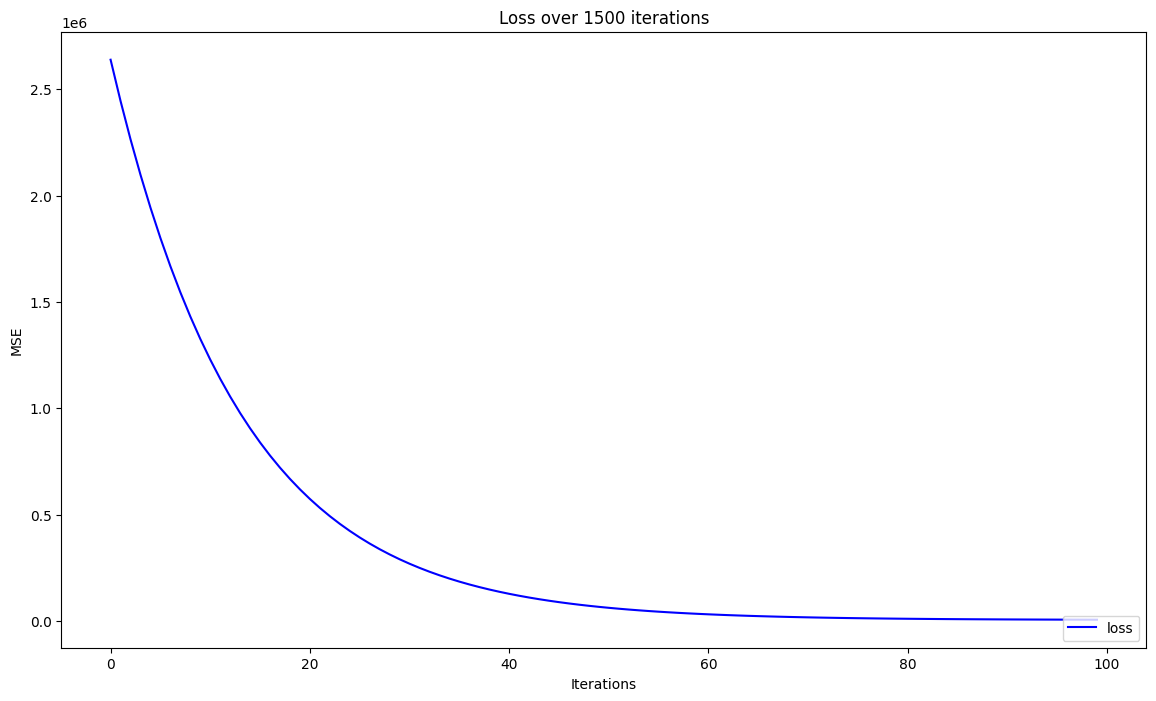

In [39]:
plt.figure(figsize=(14,8))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

### Make more experiments

In [40]:
def run_experiment(
    xs_range=None,
    coeffs=[2, -5, 4],
    init_coeffs=[0,0,0],
    figsize=(14,8),
    epochs=200,
    lr=1e-3,
    pct=0.02,
    seed=42
):

    rng = np.random.default_rng(seed)

    if xs_range is None:
        xs_range = rng.uniform(-10,10,100)

    xs = np.array(xs_range)

    ys = np.array([
        eval_nth_degree_jitter(coeffs, x, pct=pct, seed=rng)
        for x in xs
    ])

    # Sort for prettier plots
    order = np.argsort(xs)
    xs, ys = xs[order], ys[order]

    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'g+')
    plt.title('Original data')
    plt.show()

    y_bar = eval_nth_degree(init_coeffs, xs)

    initial_model_loss = loss_mse(ys, y_bar)

    calc_grads = calc_gradient_nth_poly(init_coeffs, xs, ys)

    new_model_coeffs = [
        coeff - lr * grad
        for coeff, grad in zip(init_coeffs, calc_grads)
    ]

    print(f"First iteration model coeffs: {new_model_coeffs}")

    new_y_bar = eval_nth_degree(new_model_coeffs, xs)
    updated_model_loss = loss_mse(ys, new_y_bar)

    print(f"First iteration model loss: {updated_model_loss} vs {initial_model_loss}")

    plt.figure(figsize=(14,8))
    plt.plot(xs, ys, 'g+', label = 'original model')
    plt.plot(xs, y_bar, 'ro', label = 'initial prediction')
    plt.plot(xs, new_y_bar, 'b.', label = '1st iter prediction')
    plt.title('Original model vs initial prediction vs 1st iteration prediction')
    plt.legend(loc="lower right")
    plt.show()

    GD = gradient_descent_nth(epochs, lr, xs, ys, init_coeffs)

    preds, final_coeffs, losses = GD[2], GD[1], GD[3]

    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'r+', label='original')
    plt.plot(xs, preds, 'b.', label='final')
    plt.legend()
    plt.show()

    print("Final coeffs:", final_coeffs)
    print("True coeffs:", coeffs)

    plt.figure(figsize=figsize)
    plt.plot(losses)
    plt.title("Loss")
    plt.show()


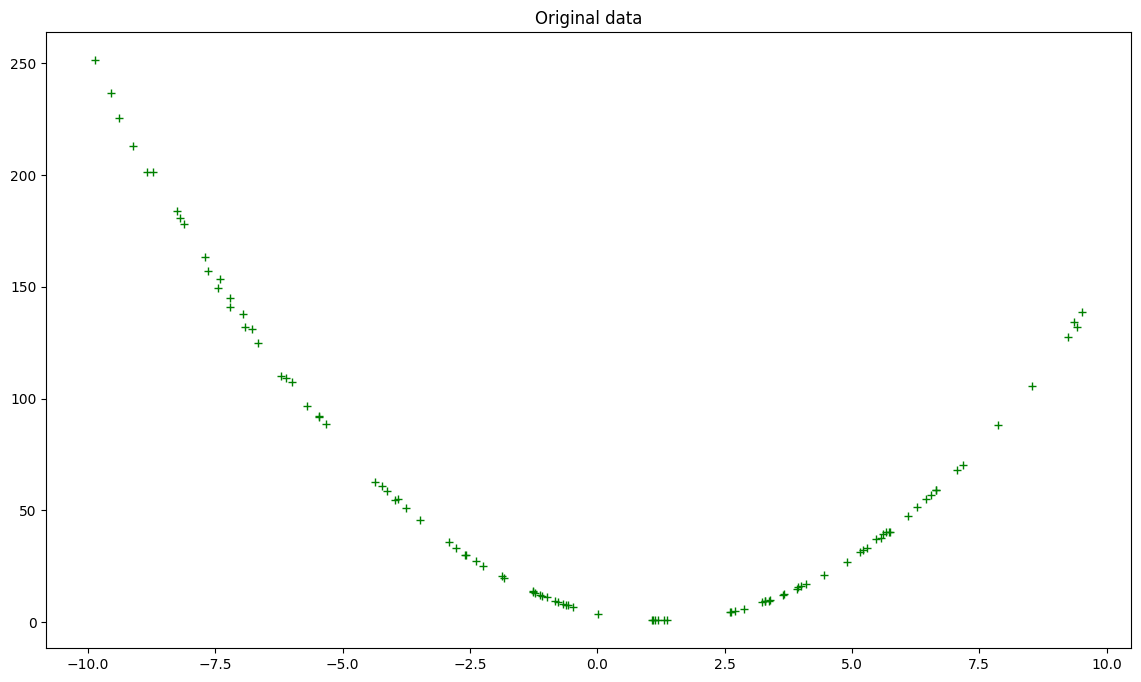

First iteration model coeffs: [np.float64(0.7021345661792259), np.float64(-0.04211511482874967), np.float64(0.01295928111579558)]
First iteration model loss: 4196.862347454917 vs 8345.503546116064


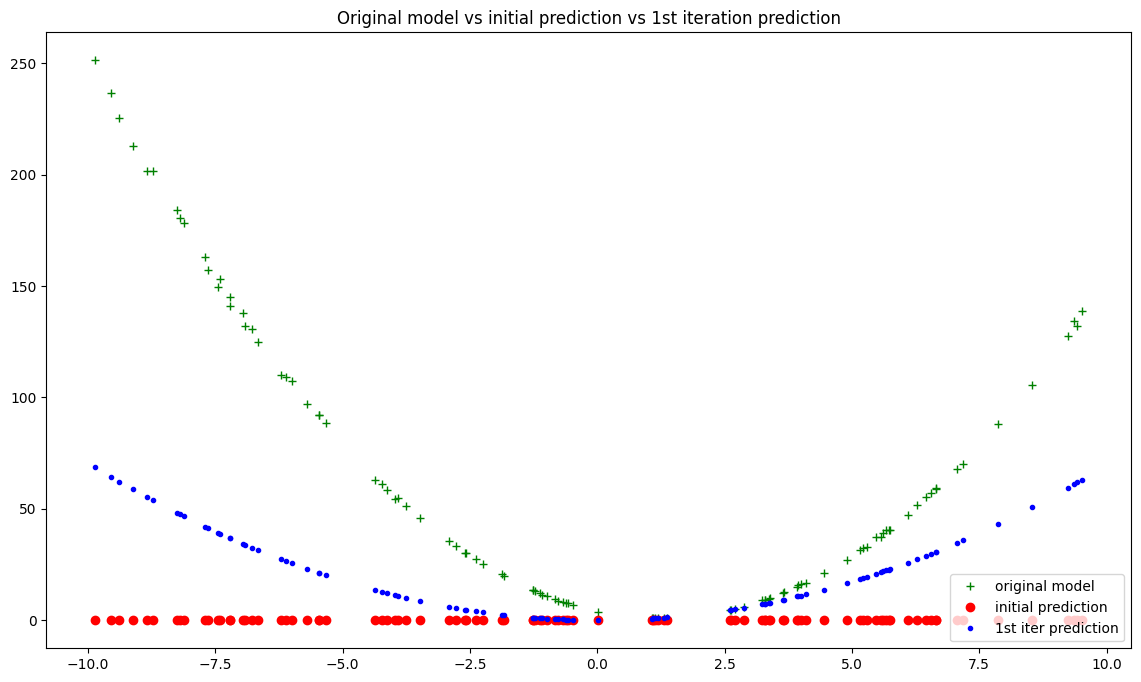

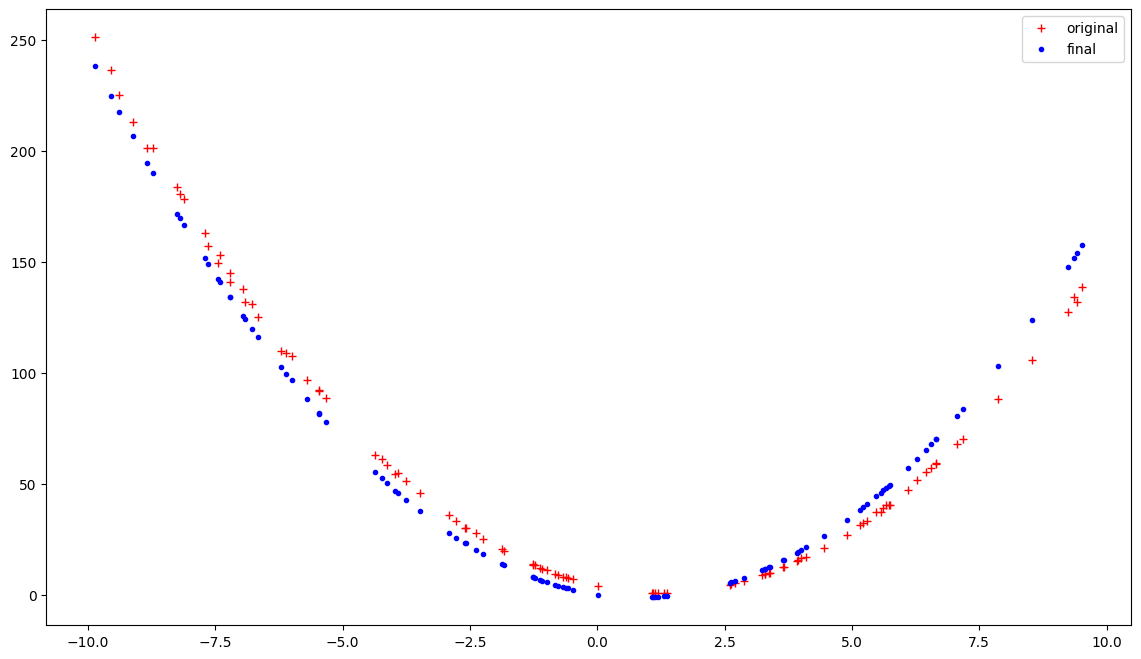

Final coeffs: [np.float64(2.103079785406421), np.float64(-3.453729752818912), np.float64(0.07591776991758999)]
True coeffs: [2, -5, 4]


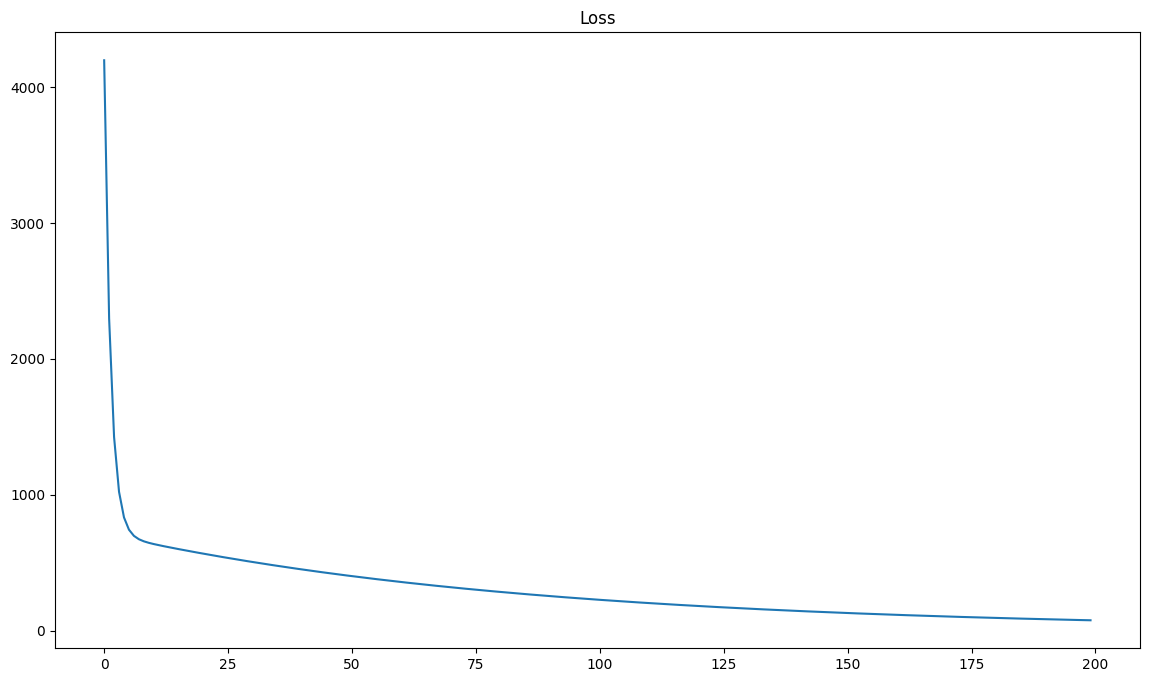

In [41]:
run_experiment(lr=1e-4)

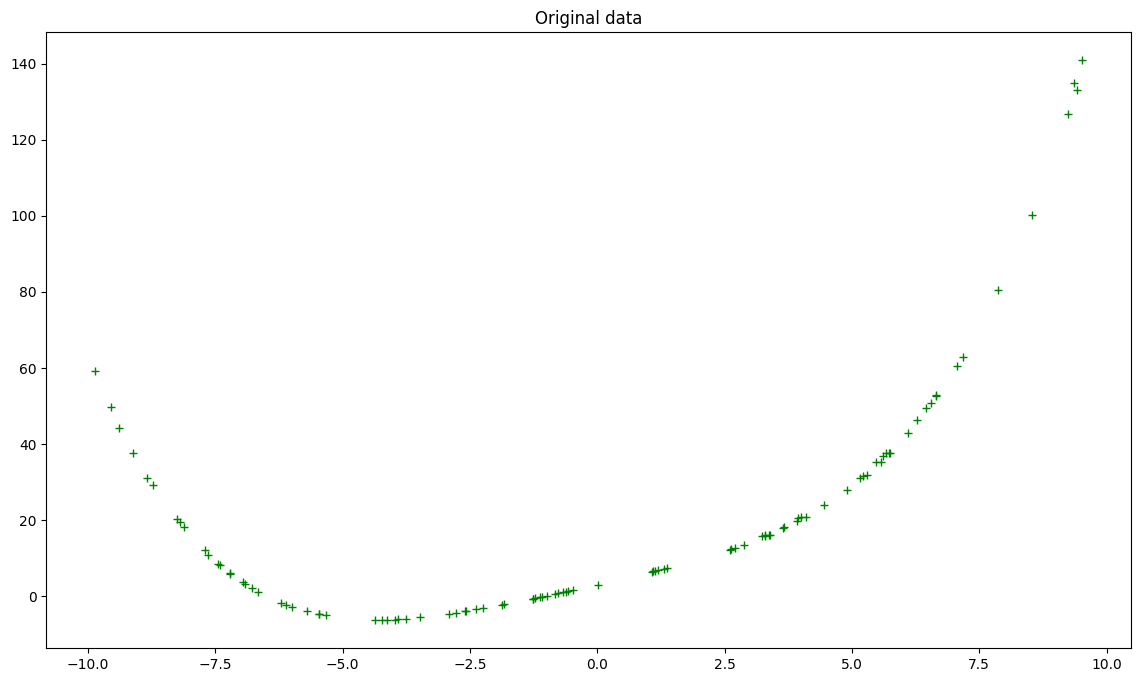

First iteration model coeffs: [np.float64(0.01721938545959824), np.float64(0.000647602177883961), np.float64(0.00023888974028107377), np.float64(1.000012690269704), np.float64(1.0000040011978346)]
First iteration model loss: 627.9580213081321 vs 1210.7874255844692


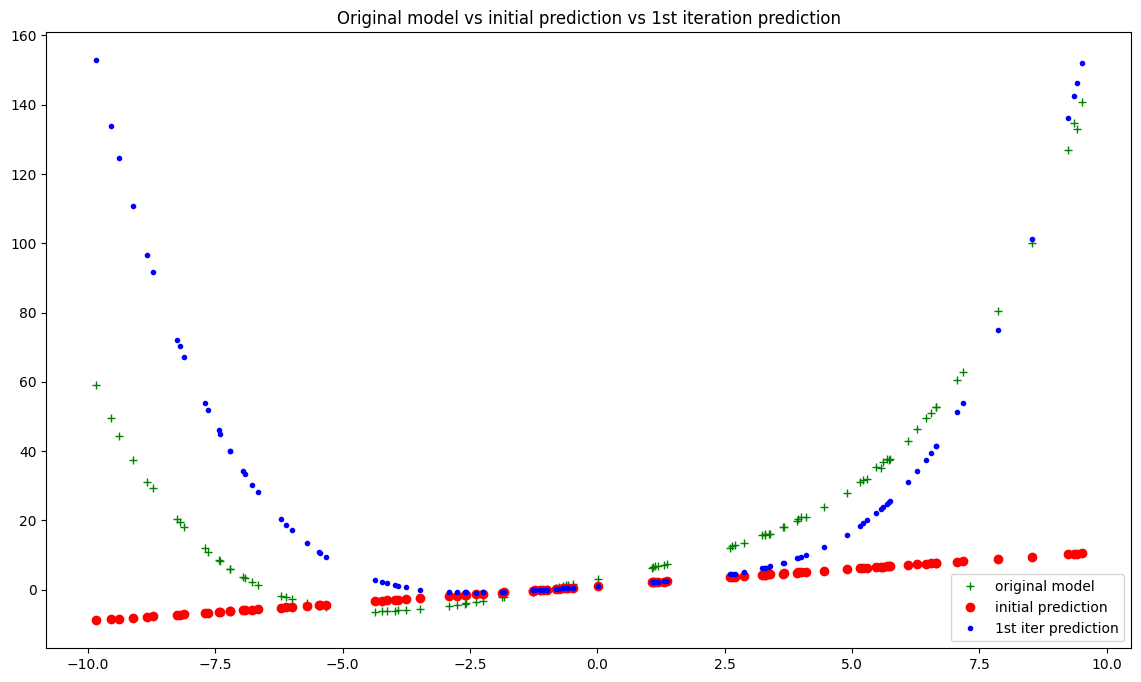

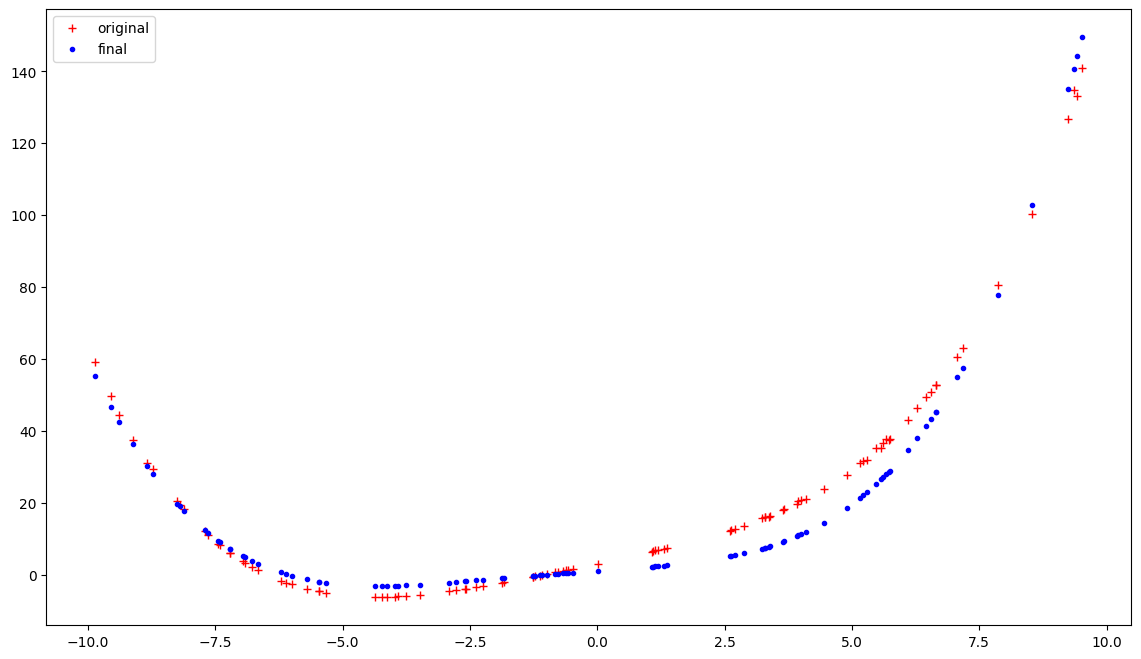

Final coeffs: [np.float64(0.01178179277382694), np.float64(0.049210668694345164), np.float64(0.0016235264935501236), np.float64(1.001196716027214), np.float64(1.0000999078116755)]
True coeffs: [0.01, 0.02, 0.1, 3, 3]


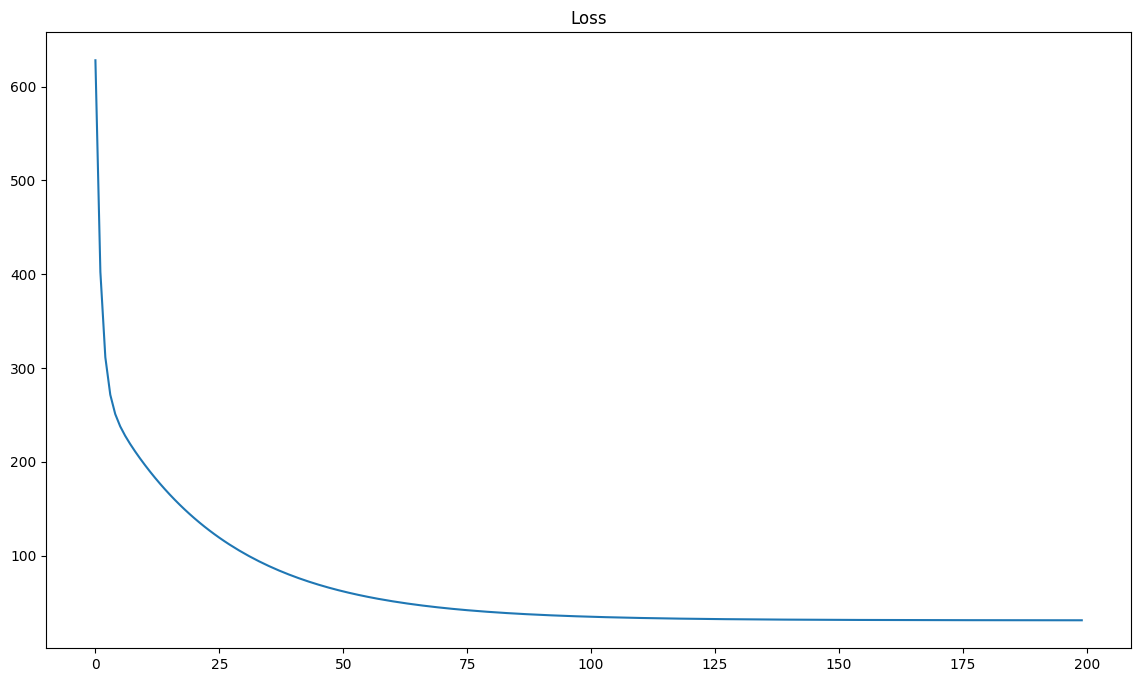

In [42]:
# Experiment 1: Small coefficients with moderate degree, slightly nonzero initial guess
# Tests how GD behaves when coefficients are tiny but not zero, moderate learning rate
run_experiment(
    coeffs=[0.01, 0.02, 0.1, 3, 3],
    init_coeffs=[0, 0, 0, 1, 1],
    lr=1e-7,
)

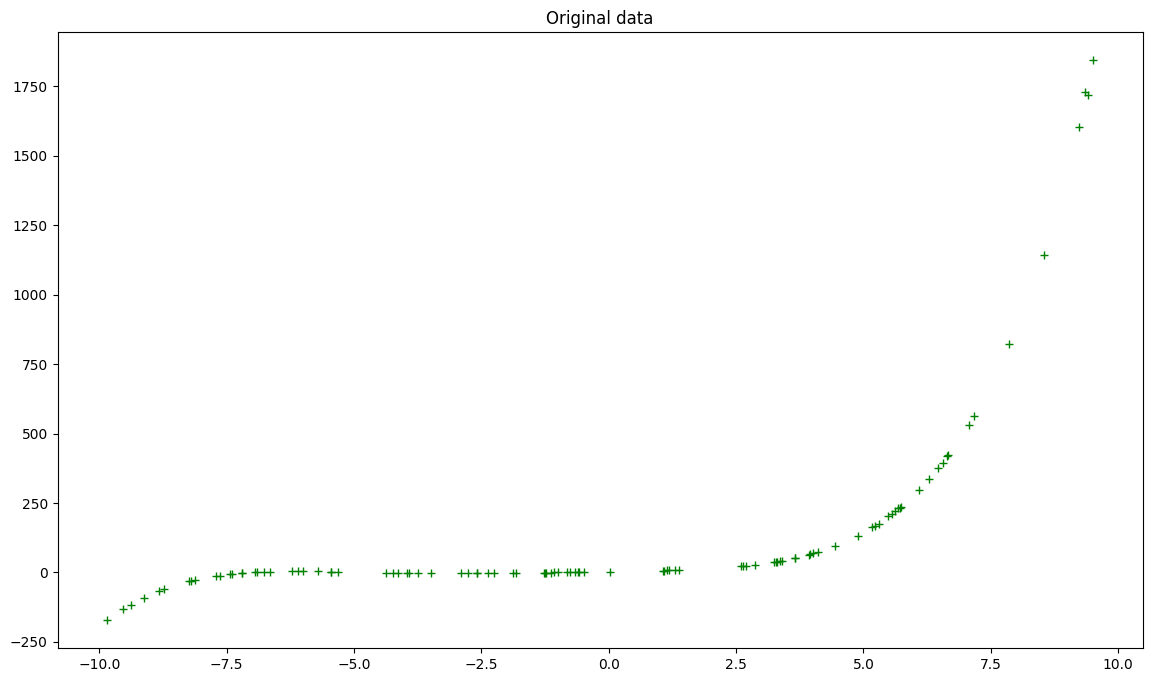

First iteration model coeffs: [np.float64(0.013732097207764924), np.float64(0.0013186516702859735), np.float64(0.00017552706312798721), np.float64(1.7943824105530813e-05), np.float64(2.477983480148162e-06), np.float64(2.8456996418112697e-07)]
First iteration model loss: 88588.53542316318 vs 158810.16397366748


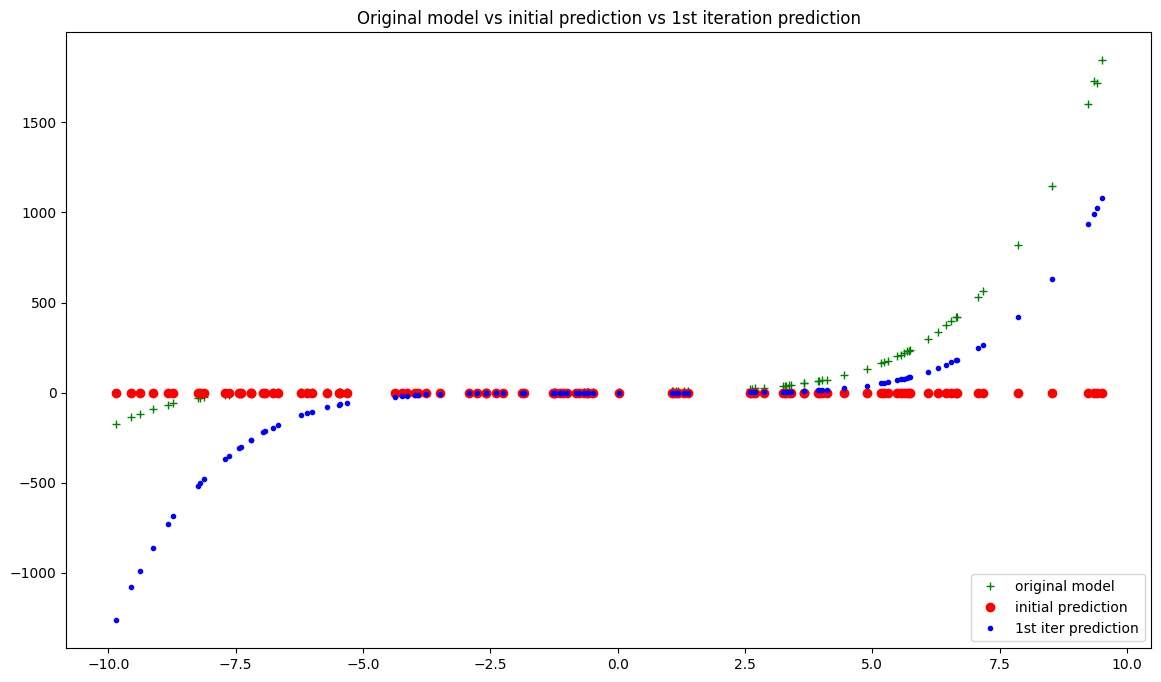

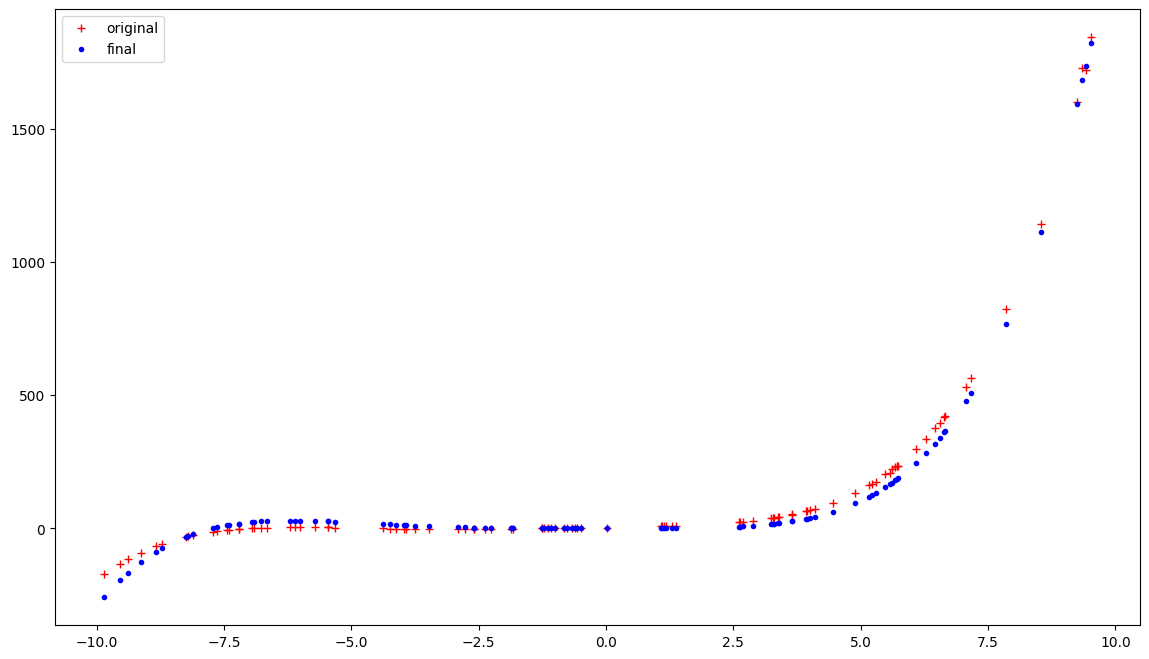

Final coeffs: [np.float64(0.012899221751792098), np.float64(0.09968218513592364), np.float64(0.0008788571381452152), np.float64(0.001368558663558947), np.float64(3.500235291393124e-05), np.float64(2.2220315505125868e-05)]
True coeffs: [0.01, 0.1, 0.2, 0.3, 3, 3]


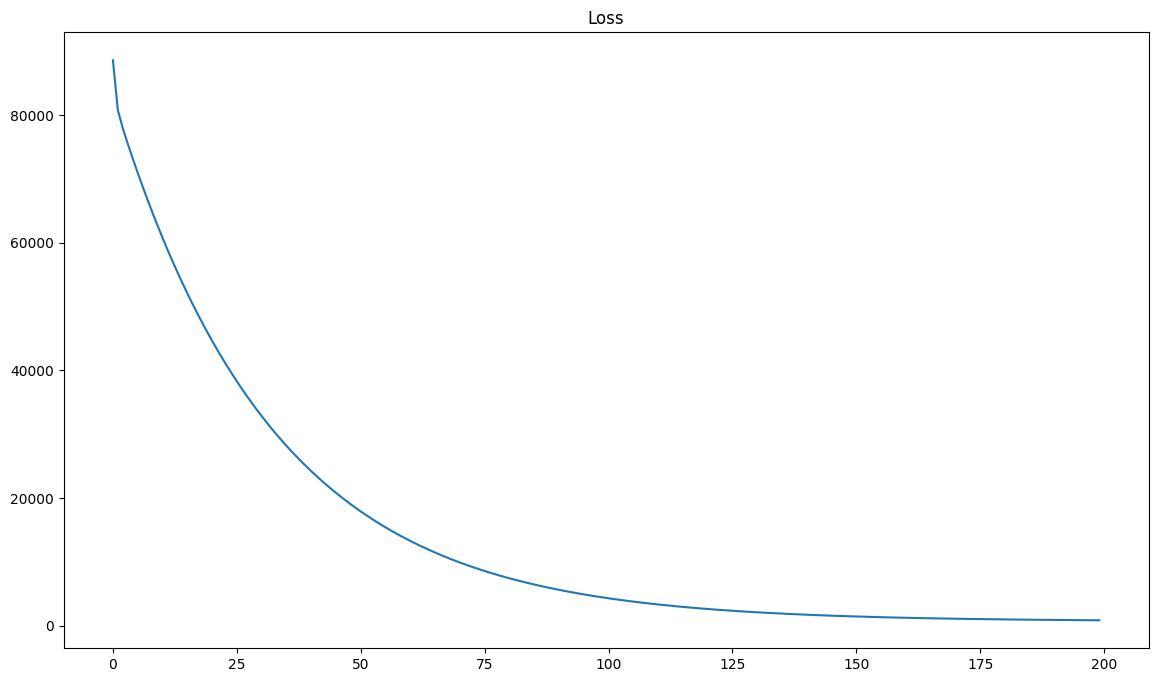

In [43]:
# Experiment 2: Slightly larger polynomial degree, all coefficients start at zero
# Tests GD on recovering more coefficients with extremely small learning rate
run_experiment(
    coeffs=[0.01, 0.1, 0.2, 0.3, 3, 3],
    init_coeffs=[0, 0, 0, 0, 0, 0],
    lr=1e-9,
)

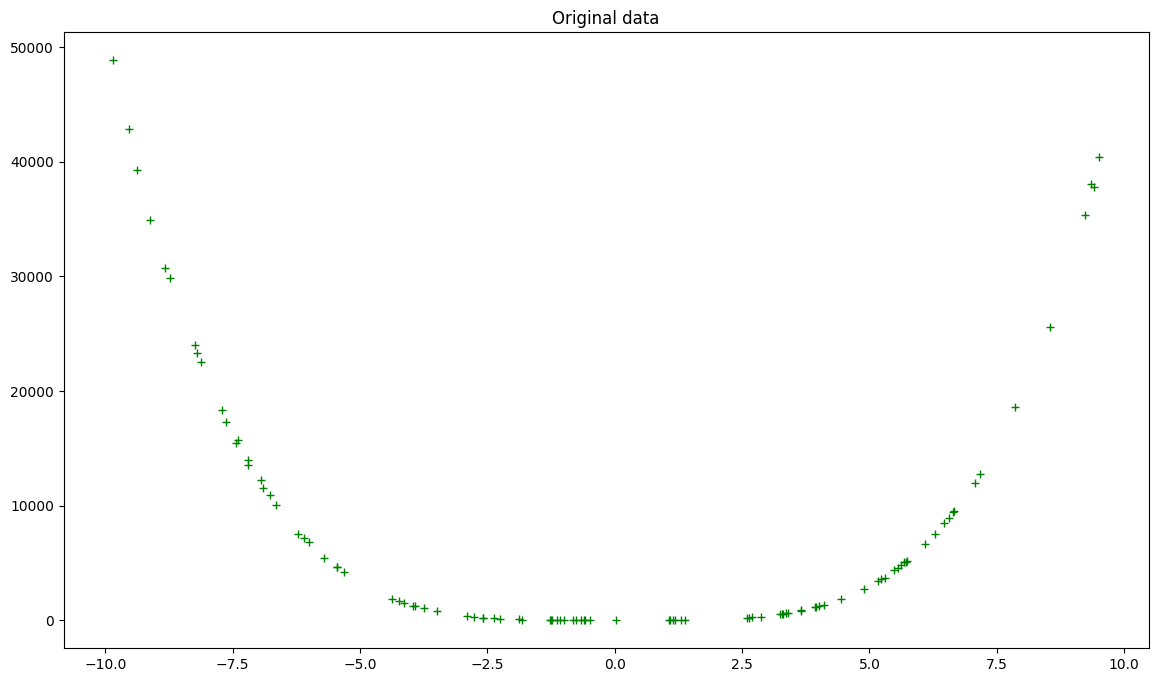

First iteration model coeffs: [np.float64(8.110891085571563), np.float64(-0.2077634770178631), np.float64(0.10891166510418034), np.float64(-0.002799090334153417), np.float64(0.0016264516193895866)]
First iteration model loss: 76891808.7735303 vs 204179023.4182871


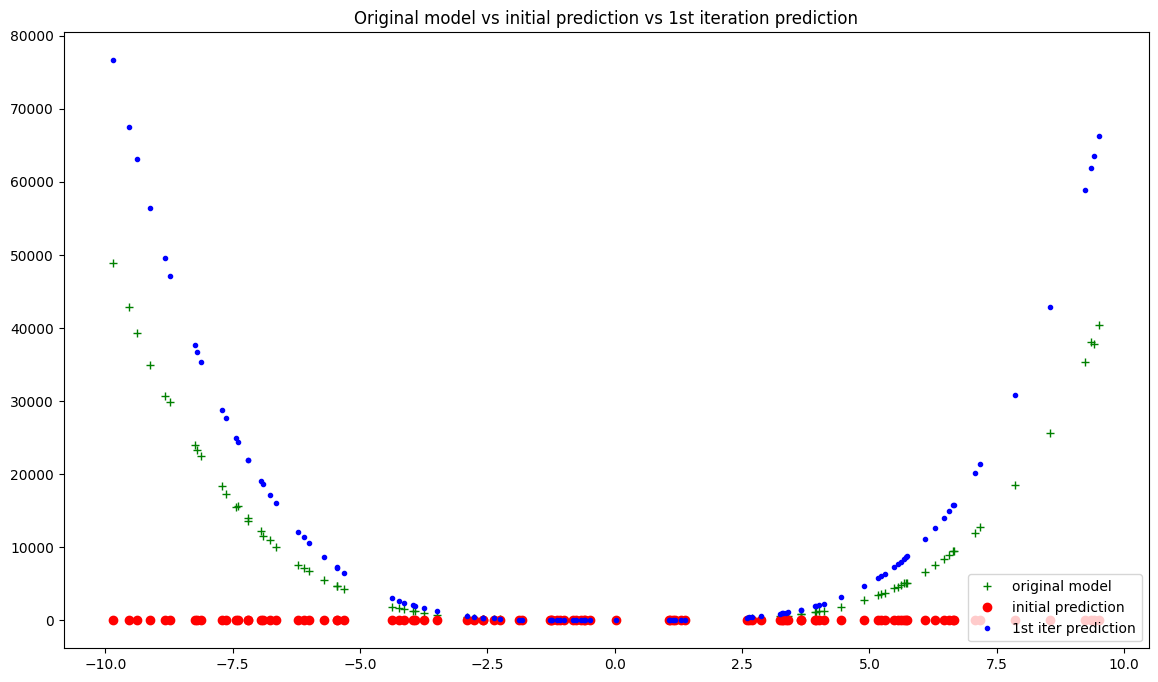

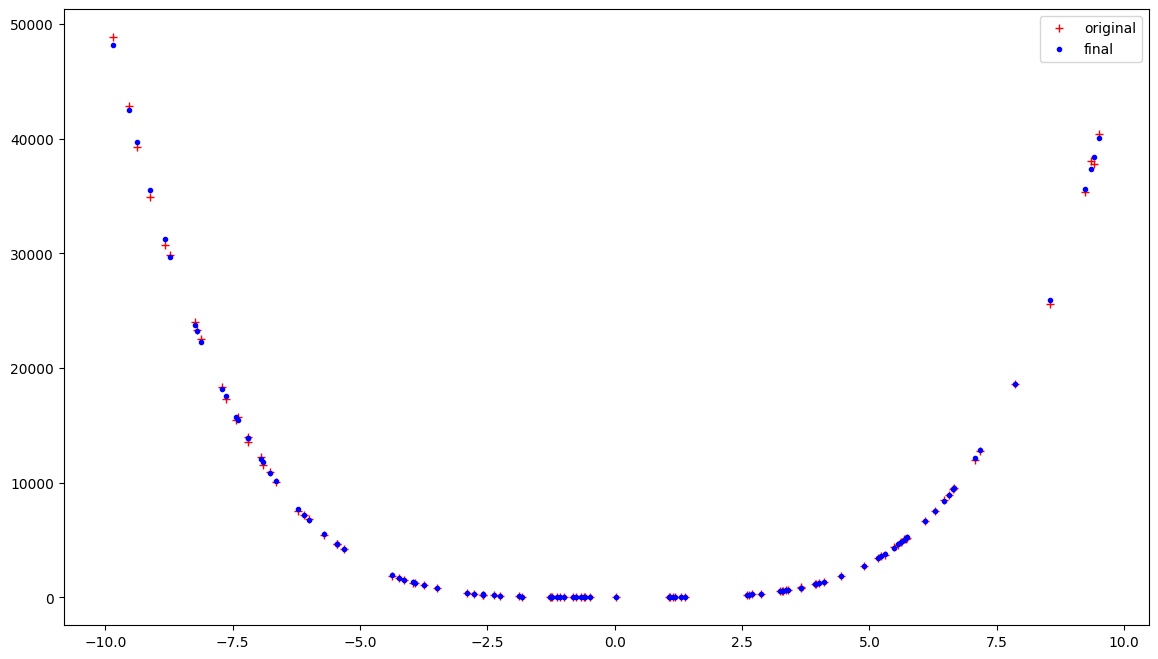

Final coeffs: [np.float64(5.005592627163926), np.float64(-1.07501279226772), np.float64(0.056247823908570194), np.float64(-0.015426844834191827), np.float64(0.0006415898140990402)]
True coeffs: [5, -1, 0.1, 0.01, 0.001]


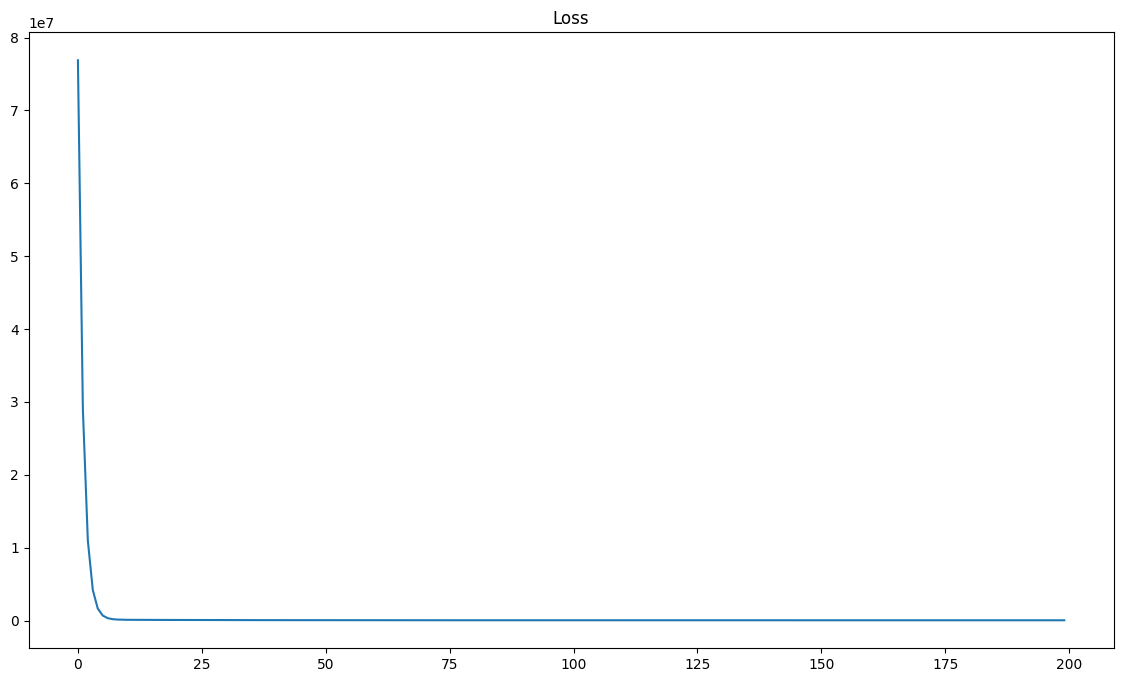

In [44]:
# Experiment 3: High-degree polynomial with decreasing powers
# Demonstrates how high-degree terms dominate and challenge GD convergence
run_experiment(
    coeffs=[5, -1, 0.1, 0.01, 0.001],
    init_coeffs=[0]*5,
    lr=1e-7,
)

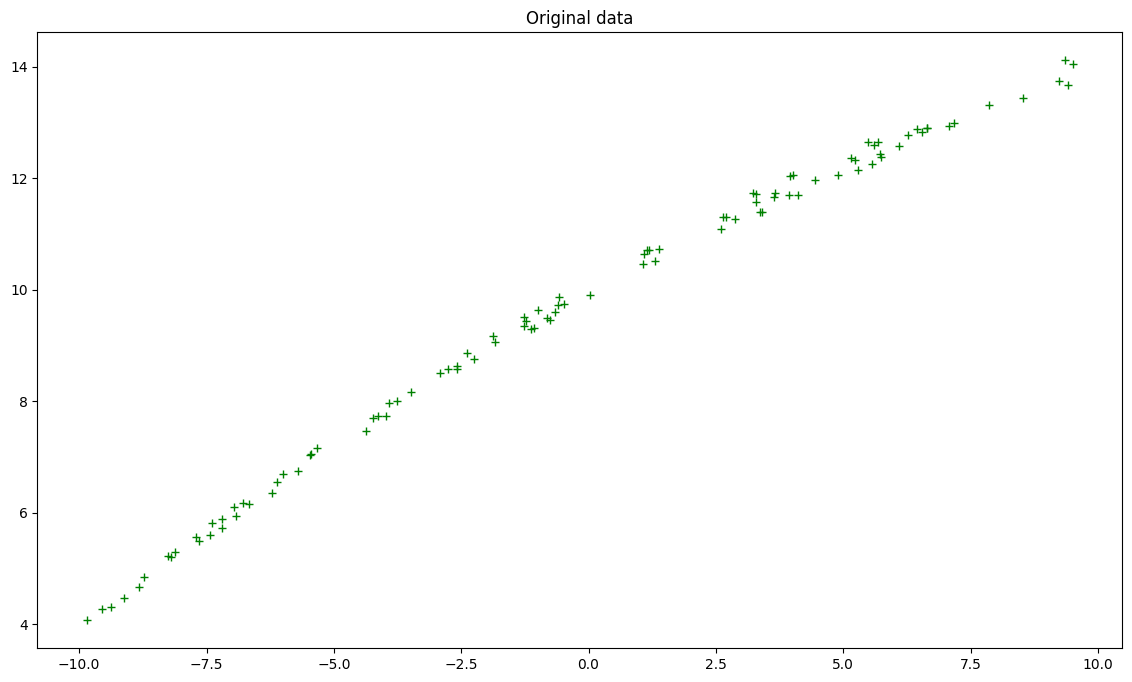

First iteration model coeffs: [np.float64(0.0010817702872548), np.float64(0.0005308994146695564), np.float64(2.515969204981466e-05), np.float64(1.912618603636704e-05)]
First iteration model loss: 97.92553310166267 vs 99.25414348166417


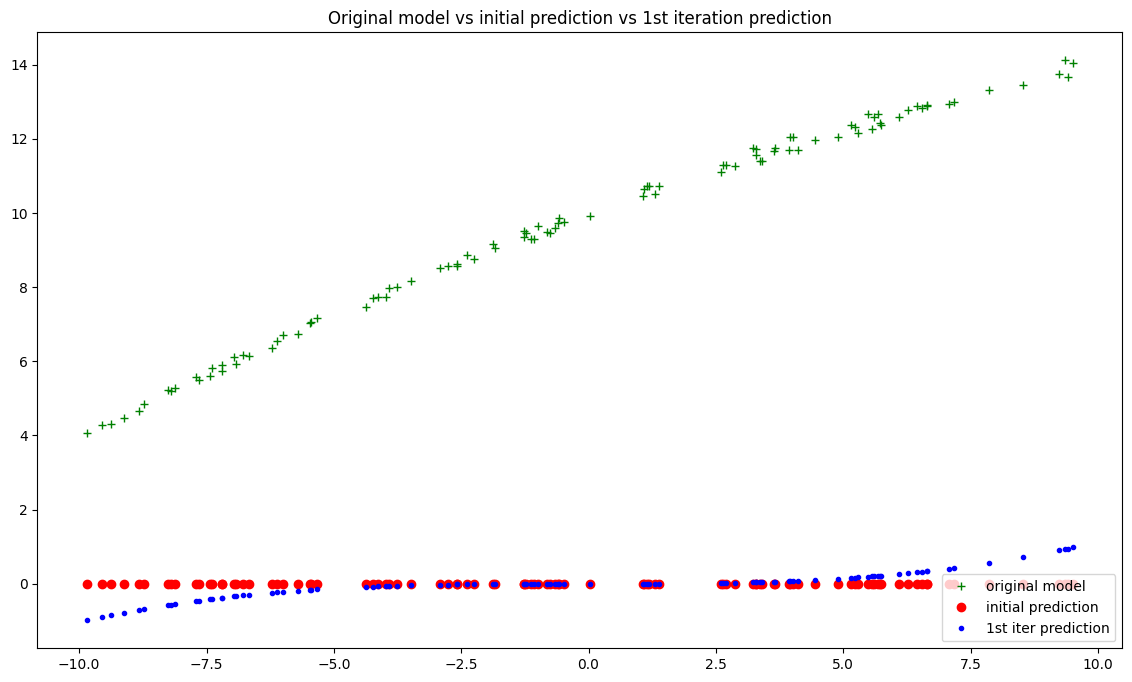

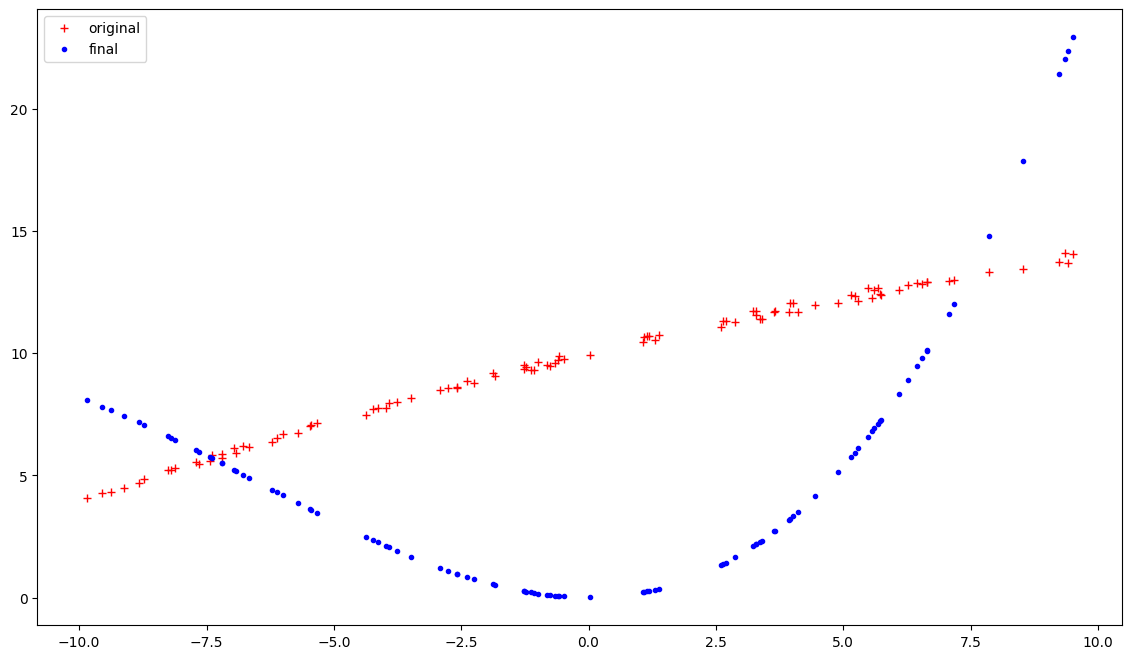

Final coeffs: [np.float64(0.008713915148338695), np.float64(0.1695775267930155), np.float64(0.0074521442590468855), np.float64(0.012258362056875307)]
True coeffs: [0.0001, -0.01, 0.5, 10]


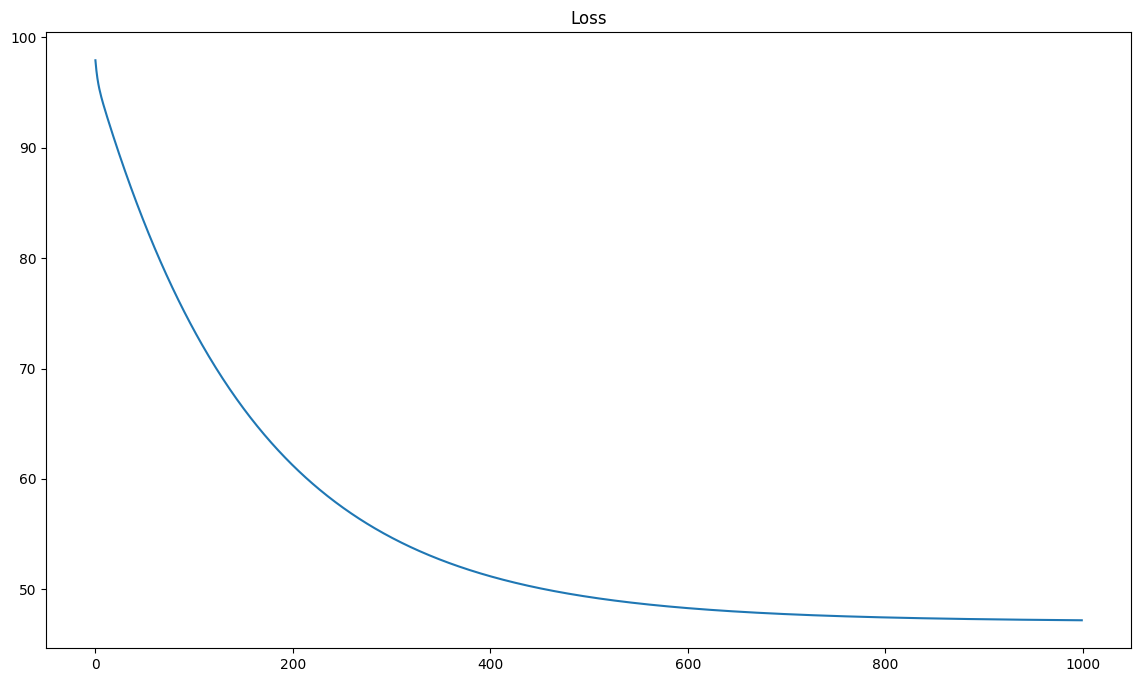

In [45]:
# Experiment 4: Large dynamic range in coefficients
# Illustrates conditioning problems and zig-zagging in gradients
run_experiment(
    coeffs=[1e-4, -0.01, 0.5, 10],
    init_coeffs=[0]*4,
    lr=1e-6,
    epochs=1000
)

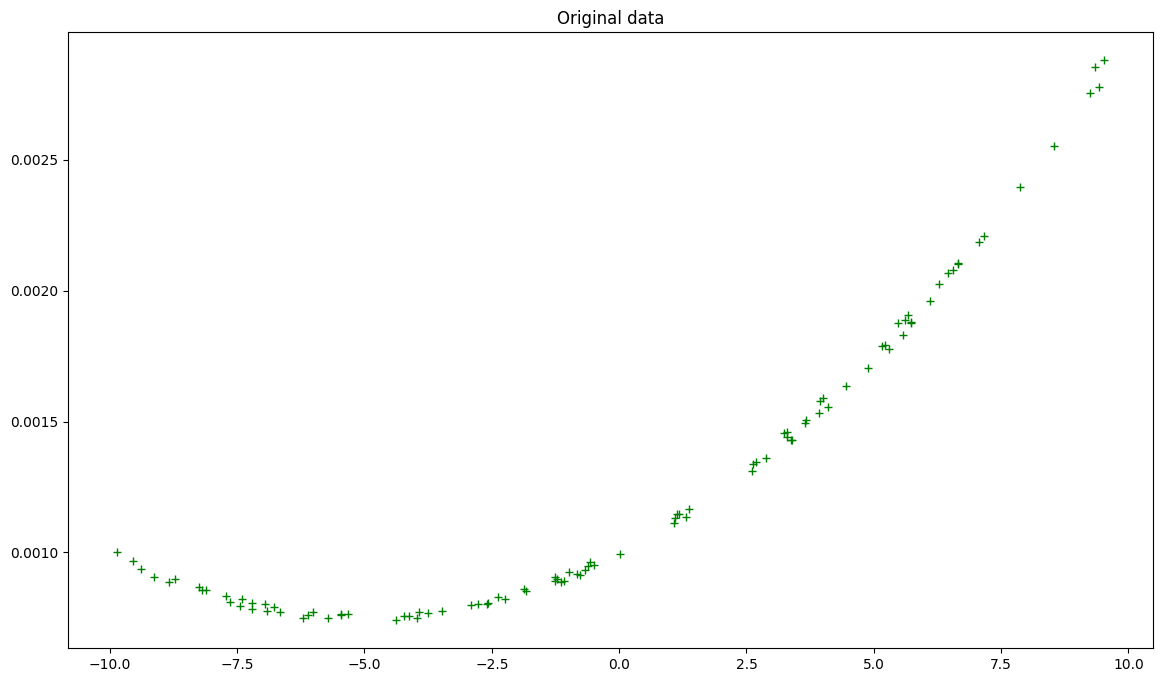

First iteration model coeffs: [np.float64(6.67154783834773), np.float64(-9.880286984986945), np.float64(4.93903264945704)]
First iteration model loss: 80942.31596234407 vs 173932.0315314349


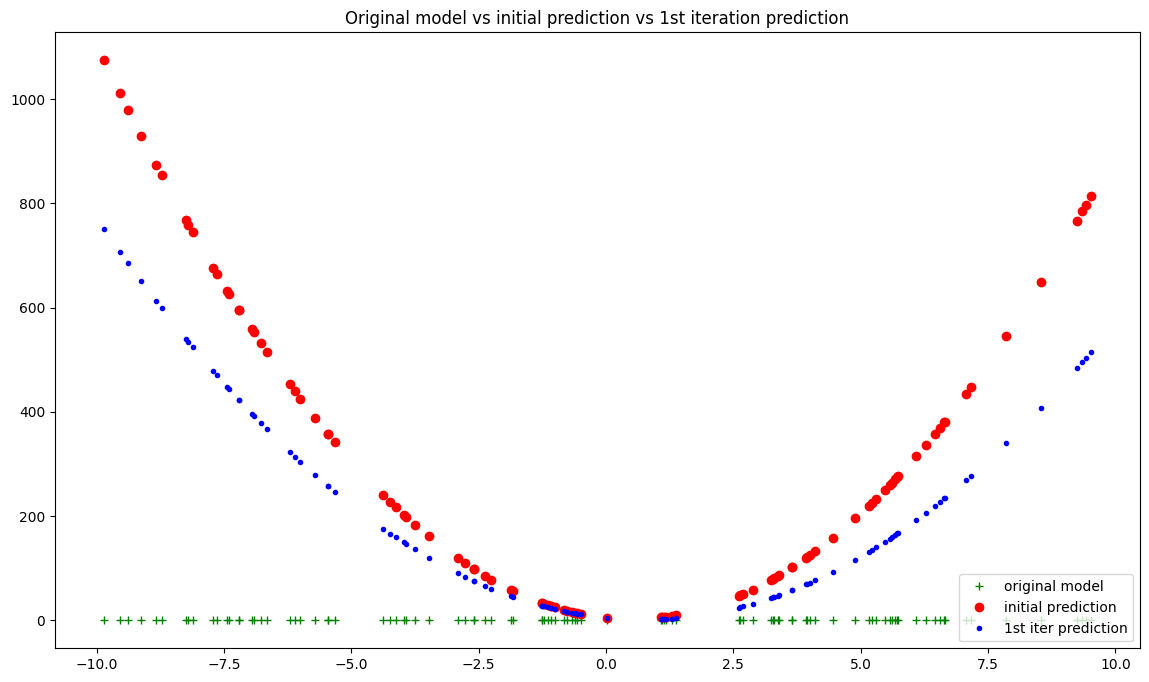

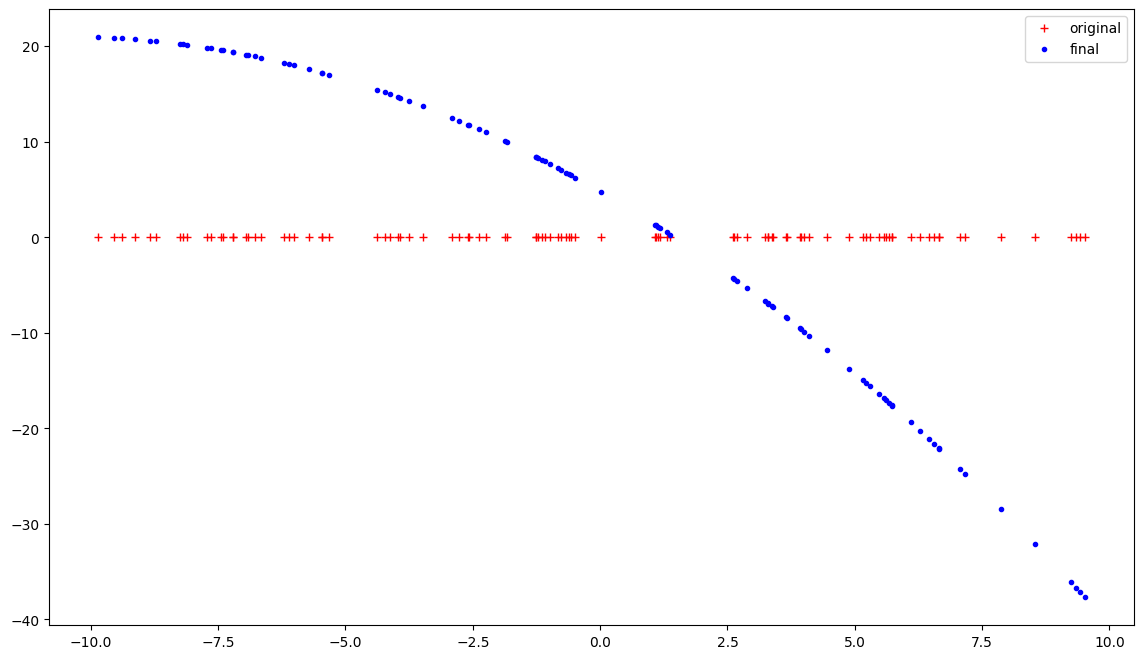

Final coeffs: [np.float64(-0.14599207685336965), np.float64(-3.077379907513469), np.float64(4.79268298679137)]
True coeffs: [1e-05, 0.0001, 0.001]


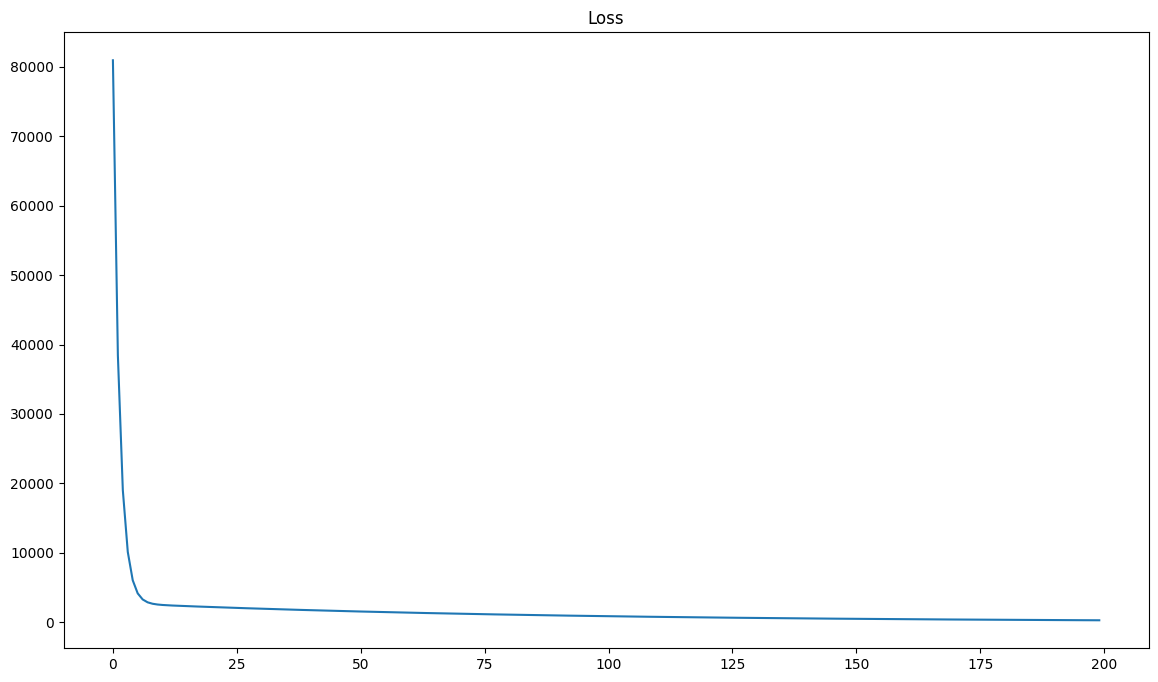

In [46]:
# Experiment 5: Almost flat function
# Shows GD struggling when gradients are very small; learning progress is slow
run_experiment(
    coeffs=[0.00001, 0.0001, 0.001],
    init_coeffs=[10, -10, 5],
    lr=1e-4,
)

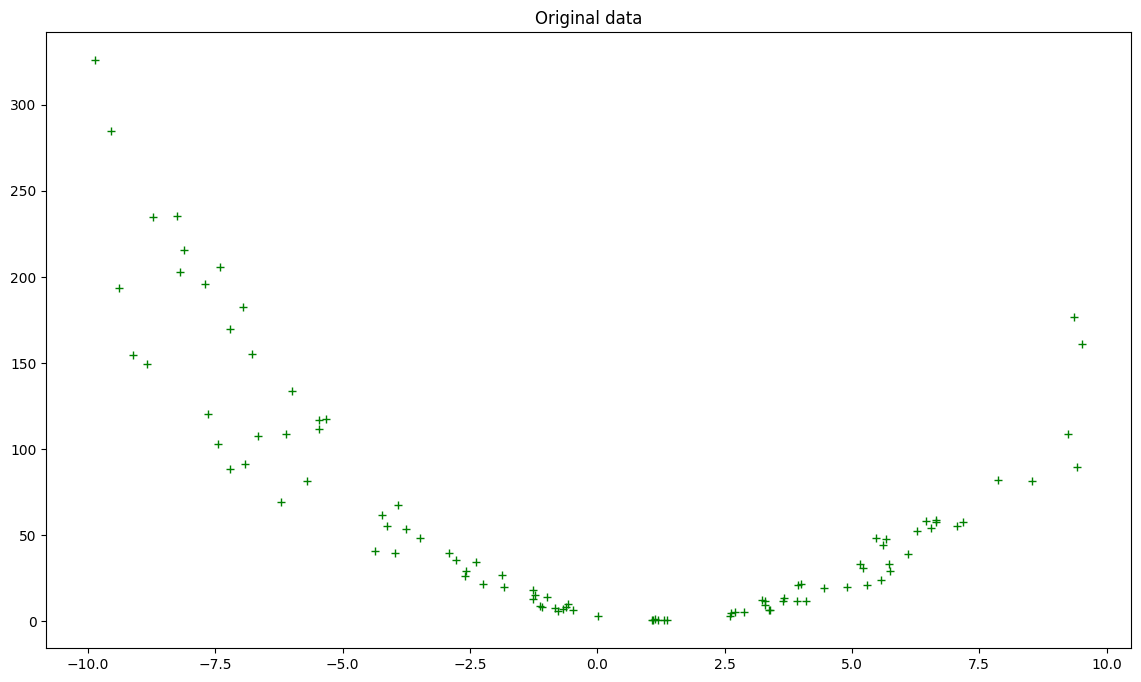

First iteration model coeffs: [np.float64(0.0713693169970028), np.float64(-0.004557931213016619), np.float64(0.001308053373815861)]
First iteration model loss: 8780.128782119184 vs 9283.461235564726


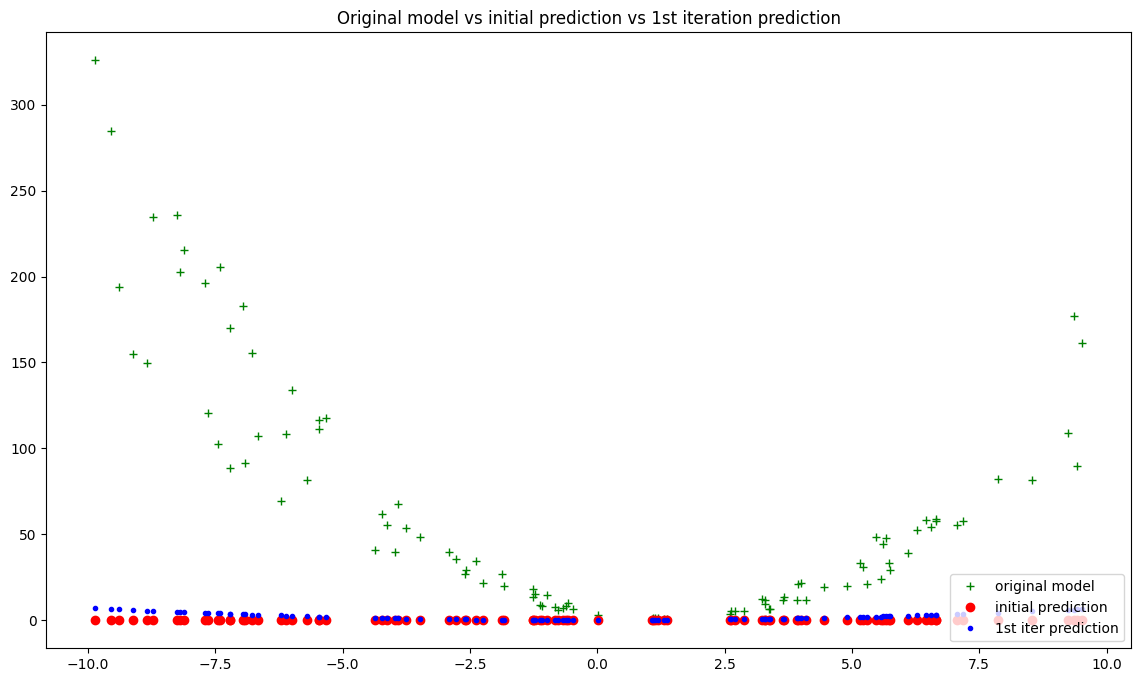

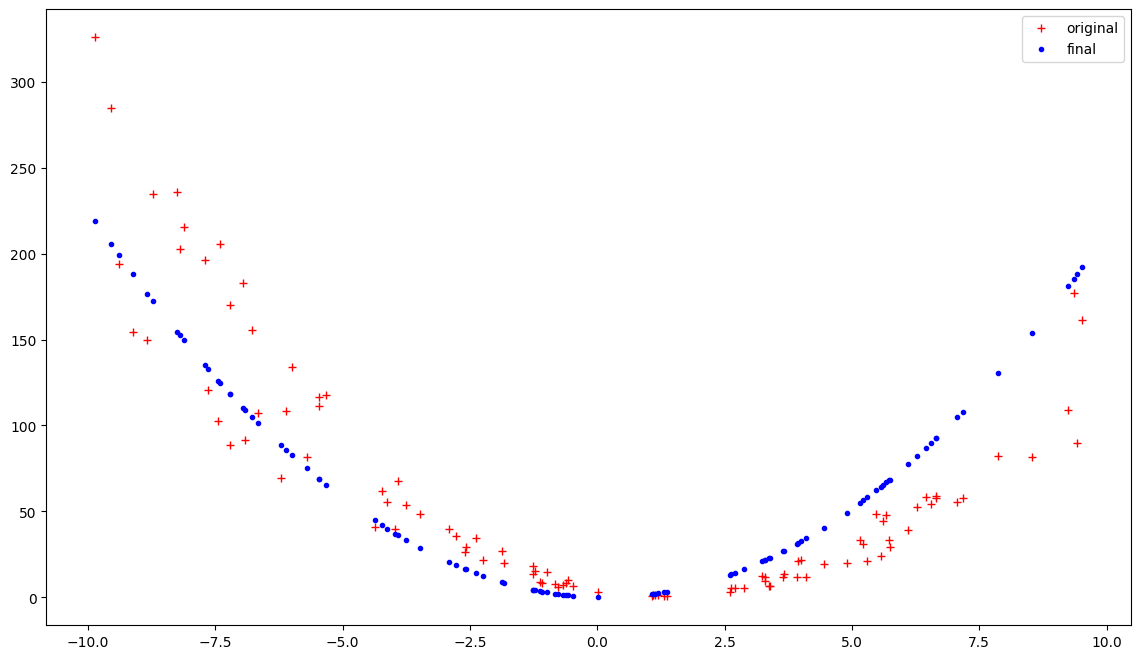

Final coeffs: [np.float64(2.1895117214579973), np.float64(-0.6477429519463108), np.float64(0.04017062880514894)]
True coeffs: [2, -5, 4]


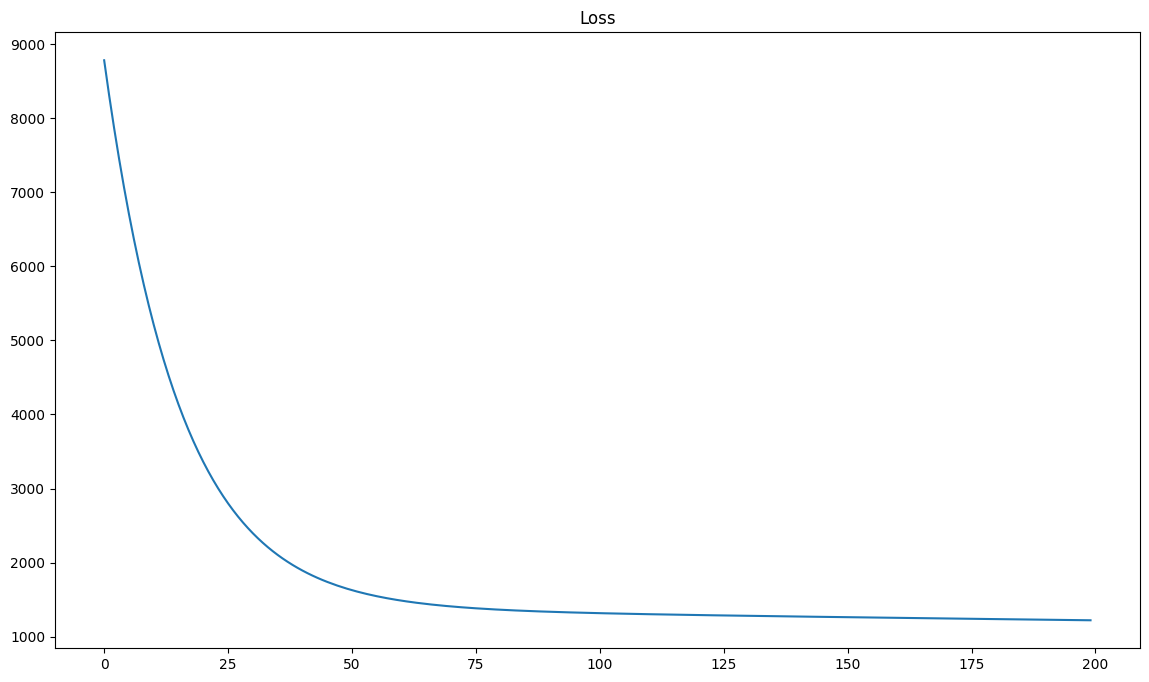

In [47]:
# Experiment 6: High noise added to data
# Demonstrates the effect of noise: GD cannot recover exact coefficients, only best fit
run_experiment(
    coeffs=[2, -5, 4],
    pct=0.4,
    lr=1e-5,
)

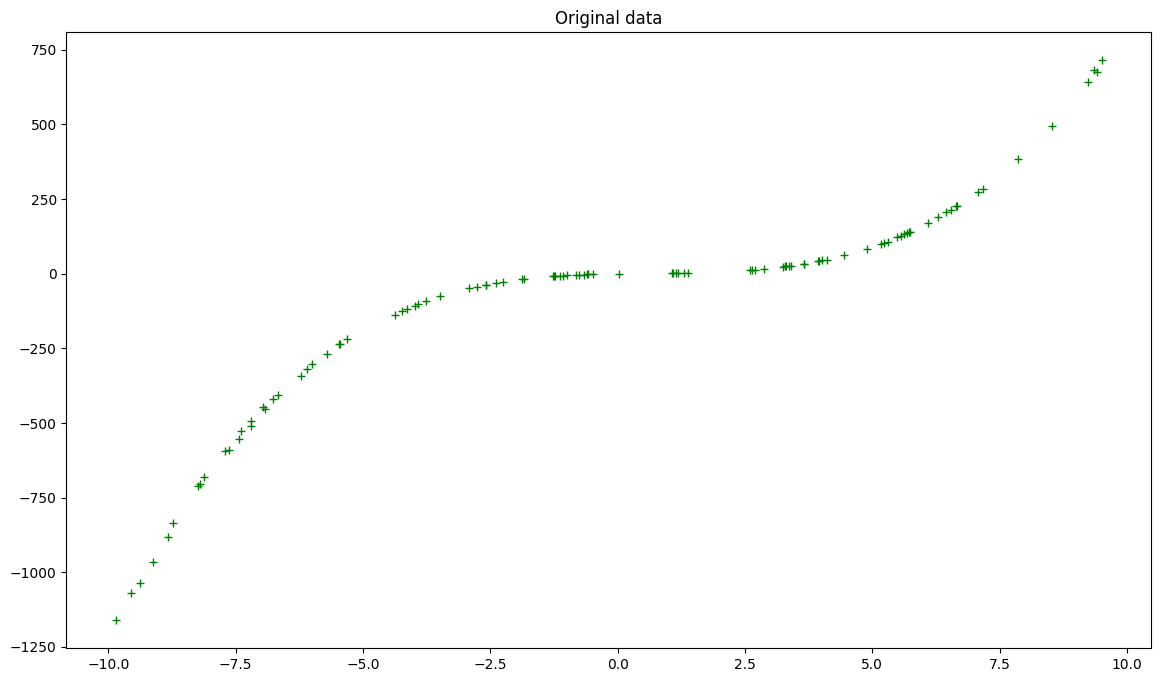

First iteration model coeffs: [np.float64(777.1361422753014), np.float64(-991.8629559306594), np.float64(496.6751748821287), np.float64(200.11913329502067)]
First iteration model loss: 71840386462.36798 vs 116195498802.62732


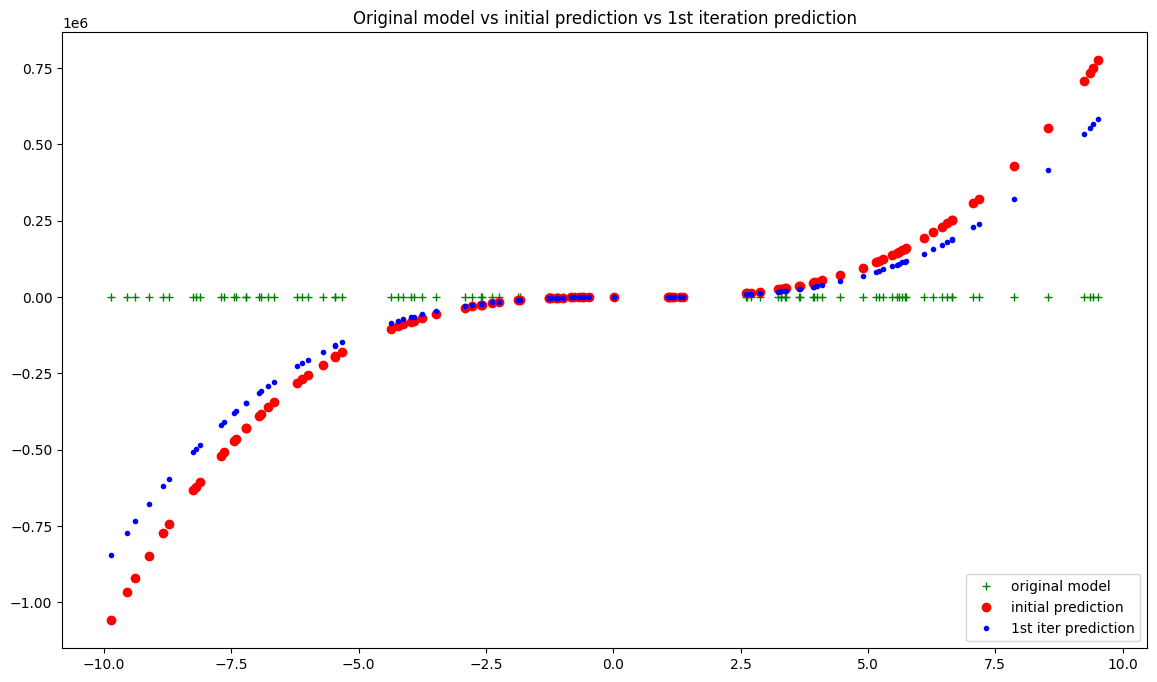

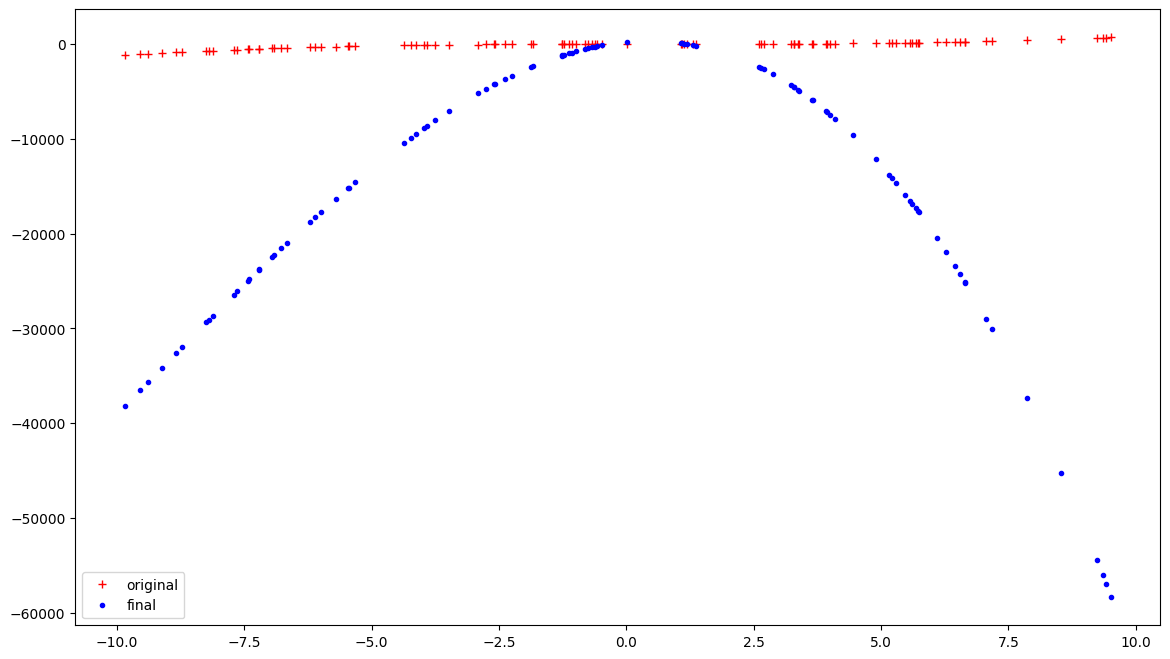

Final coeffs: [np.float64(-18.15723159108695), np.float64(-525.6047456229187), np.float64(485.6088450920076), np.float64(208.61424090630726)]
True coeffs: [1, -2, 3, 0.5]


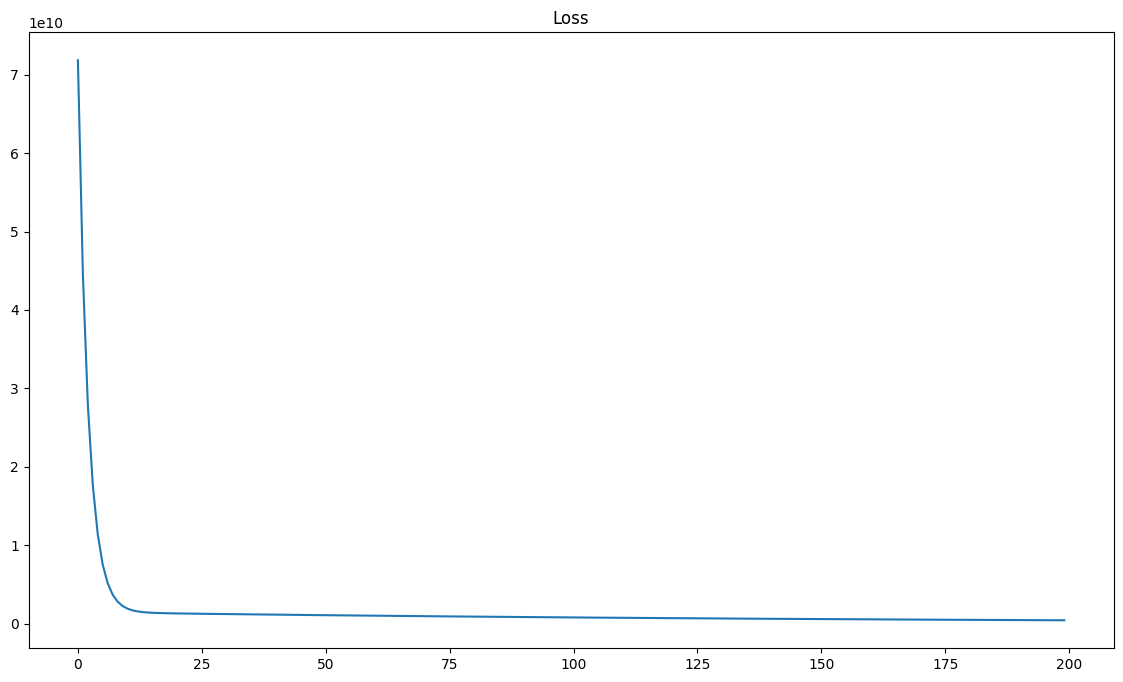

In [48]:
# Experiment 7: Poor initialization far from solution
# Coefficients start very large, testing GD's sensitivity to initial values
# Shows slow convergence or initial loss spike
run_experiment(
    coeffs=[1, -2, 3, 0.5],
    init_coeffs=[1000, -1000, 500, 200],
    lr=1e-6,
)